# **Курсовой проект (Чебанов К.А.) от 25.09.2020**

Для данного курсового проекта было выбрана тема: Predict NYC Airbnb Rental Prices (https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/tasks?taskId=181)

---
Детали задания:

По состоянию на август 2019 года этот набор данных содержит почти 50 тысяч объявлений Airbnb в Нью-Йорке. Цель этой задачи - спрогнозировать стоимость аренды Airbnb в Нью-Йорке на основе предоставленных данных и любых внешних наборов данных с соответствующей информацией.

---
Подробное описание:

Датасет записан в файле, имеющем формат csv. 

Он состоит из 16 колонок(переменных) и 48895 рядков(наблюдений).

Переменные следующие:

 - id
 - name
 - host_id
 - host_name
 - neighbourhood_group
 - neighbourhood
 - latitude
 - longitude
 - room_type
 - price
 - minimum_nights
 - number_of_reviews
 - last_review
 - reviews_per_month
 - calculated_host_listings_count
 - availability_365

Таргетом мы выбираем переменную **price**. Во-первых потому что это в рамках текущего задания, во-вторых это логично, иметь предикшен там - где это представляет для нас интерес. Что может быть интереснее предикшена на деньги для продакшена? 



In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Импорт всех библиотек и методов, которые нам понядобятся во время работы.**

In [112]:
# !pip install fasttext
# !pip install polyglot
!pip install catboost
!pip install hyperopt
!pip install lightgbm
!pip install -U gensim
!pip install langdetect
!pip install bayesian-optimization
!pip install scikit-optimize
# !pip install pycld3
# import cld3
# from polyglot.detect import Detector
# import fasttext

     |████████████████████████████████| 11.4 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 36.5 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=1d00b3659620442ecb95532edab2e9615221e3af0e8e6b521030503705f7e901
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Requirement already up-to-date: gensim in /Users/admin/opt/anaconda3/lib/python3.8/site-packages (3.8.3)


**Импорт файла, который содержит рабочий датасет.**

In [7]:
air_set = pd.read_csv('/Users/admin/CourseWork_DS/AB_NYC_2019.csv')#('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

**Для начала посмотрим наш датасет**

In [8]:
pd.concat([air_set.head(5), air_set.tail(5)])

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [9]:
display(air_set.shape)
air_set.info()

(48895, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
air_set.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

Мы видим, что наш датасет имеет 3 типа переменных.
- 7 переменных типа int64
- 6 переменных типа object
- 3 переменных типа float64

Так же мы видим, что следующие переменные не полностью заполнены по всем наблюдениям:
- name
- host_name
- last_review
- reviews_per_month



Глянем количество NaN в каждой из переменных датасета

In [11]:
air_set.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Убирать NaN будем в конце всех преобразований датасета. Так как может быть такое, что мы не будем вообще использовать переменные в которых есть пропуски. 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<ipython-input-12-6eba5a51414e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  air_set.hist(ax=ax)


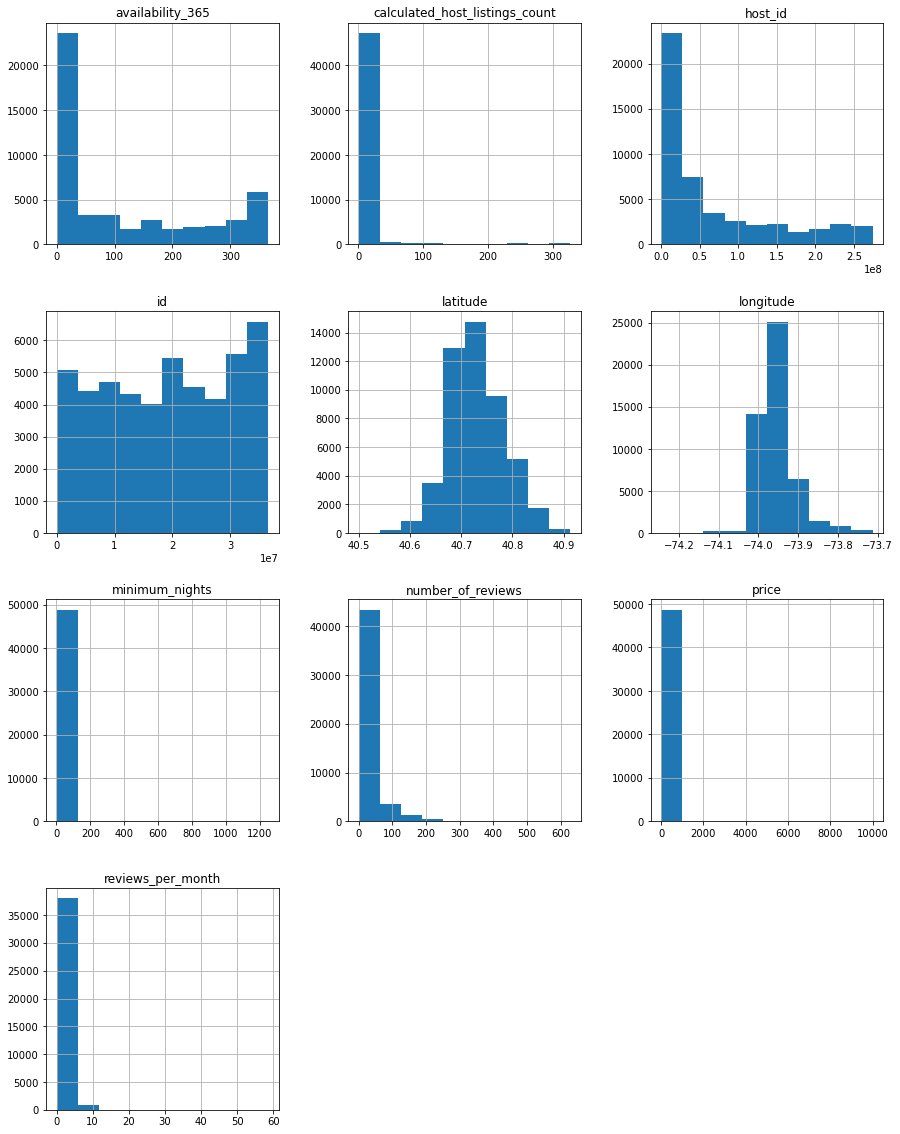

In [12]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
air_set.hist(ax=ax)
plt.show()

Нас в первую очередь интересует переменная price. Чуть позже мы ее более внимательно посмотрим.
Так же нам надо сделать корреляцию. Пока что мы видим, что переменная price далека от нормального распределения. 

In [13]:
air_set.corr()

id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.291828  0.296417 -0.010142   0.145948   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id                         0.015309       -0.017364          -0.140106   
latitude                        0.033939        0.024869          -0.015389   
longitude                      -0.150019       -0.062747           0.059094   
price                           1.000000        0.042799          -0.047954   
minimum_nights                  0.042799        1.000000          -0.080116   
number_of_reviews              -0.047954       -0.080116           1.000000   
reviews_per_month              -0.030608       -0.121702           0.549868   
calculated_host_listings_count  0.057472        0.127960          -0.072376   
availability_365                0.081829        0.144303           0.172028   

                                reviews_per_month  \
id                                       0.291828   
host_id                                  0.296417   
latitude                                -0.010142   
longitude                                0.145948   
price                                   -0.030608   
minimum_nights                          -0.121702   
number_of_reviews                        0.549868   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.009421   
availability_365                         0.185791   

                                calculated_host_listings_count  \
id                                                    0.133272   
host_id                                               0.154950   
latitude                                              0.019517   
longitude                                            -0.114713   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                    -0.009421   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
id                                      0.085468  
host_id                                 0.203492  
latitude                               -0.010983  
longitude                               0.082731  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
reviews_per_month                       0.185791  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

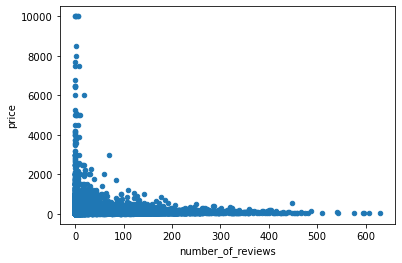

In [14]:
air_set.plot.scatter(x = 'number_of_reviews', y = 'price')

Держим в уме правило Романа о корреляции больше чем 0.9 не забывая об общем правиле, что если корреляция больше 0.7 то надо что то делать.(Либо удалять одну из переменных, либо трансформировать разрушая связь)
Но у нас нет переменных с сильными связями. Оставляем все как есть.


Рассмотрим более внимательно переменные, которые нас интересуют , которые могут сильно влиять на прогноз цены, которые нам нужно будет нормализовать.

In [15]:
display(air_set['price'].describe())
print('*' * 40)
display(air_set['reviews_per_month'].describe())
print('*' * 40)
display(air_set['number_of_reviews'].describe())
print('*' * 40)
display(air_set['availability_365'].describe())
print('*' * 40)
display(air_set['minimum_nights'].describe())


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

****************************************


count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

****************************************


count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

****************************************


count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

****************************************


count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

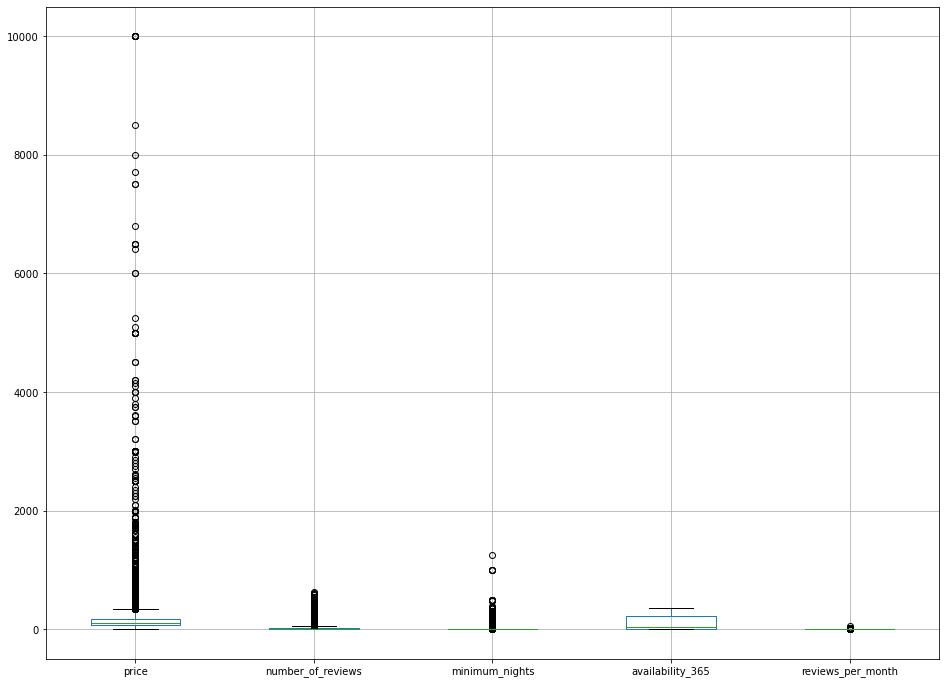

In [16]:
plt.figure(figsize = (16, 12))

air_set.boxplot(column=['price', 'number_of_reviews', 'minimum_nights', 'availability_365', 'reviews_per_month'])

По переменной price мы видим очень большие выбросы. Стандартное отклонение 240. Среднее 150. 

Принимаем условия:

Все что > 500 = 500

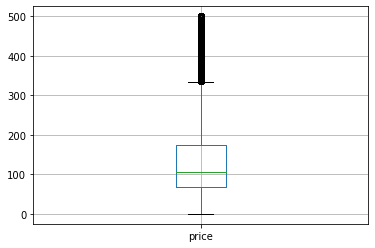

In [17]:
air_set[air_set['price']  > 500] = 500

air_set.boxplot(column='price')

In [18]:
air_set.select_dtypes(include=['object']).apply(set)

name                   {nan, Charming 2Br in the middle of LES, SoHo,...
host_name              {nan, Kc, Alia, Garen, Fran, Swan, Michal, Cor...
neighbourhood_group    {Queens, Staten Island, Bronx, 500, Brooklyn, ...
neighbourhood          {East New York, Edgemere, Woodhaven, Mount Ede...
room_type              {Shared room, 500, Entire home/apt, Private room}
last_review            {nan, 2018-09-30, 2015-10-15, 2016-05-21, 2016...
dtype: object

In [19]:
air_set['neighbourhood'].nunique(), air_set['neighbourhood_group'].nunique(), air_set['room_type'].nunique(), air_set['name'].nunique(), air_set['host_id'].nunique(), air_set['host_name'].nunique()

(220, 6, 4, 46881, 36754, 11291)

**Chi-Squared Test** используется только для категориальных признаков

In [23]:
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency
from scipy.stats import normaltest

In [20]:
 
stat, p, dof, expected = chi2_contingency((pd.crosstab(air_set['neighbourhood_group'], air_set['neighbourhood']).values))
print('stat={}, p_value={}. {}'.format(round(stat, 3), round(p, 3), 'Probably dependent' if p > 0.05 else 'Probably independent') )
 

stat=244475.0, p_value=0.0. Probably independent


In [21]:
 
stat, p, dof, expected = chi2_contingency((pd.crosstab(air_set['room_type'], air_set['name']).values))
print('stat={}, p_value={}. {}'.format(round(stat, 3), round(p, 3), 'Probably dependent' if p > 0.05 else 'Probably independent') )

stat=145638.869, p_value=0.0. Probably independent


**Student's t-test**

In [22]:
data1 = air_set['price']
data2 = air_set['calculated_host_listings_count']

stat, p = ttest_rel(data1, data2)
print('stat={}, p_value={}. {}'.format(round(stat, 3), round(p, 3), 'Probably dependent' if p > 0.05 else 'Probably independent') )

stat=300.368, p_value=0.0. Probably independent


In [24]:
air_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

По поводу выбора стретегии и энекодинга переменных. 
Я собираюсь начать с регрессии и закончить нейросетями. 
Энкодинг делать через one hot encoding. 

Для того что бы посчитать регрессии - переведем через ohe  следующие переменные:
- neighbourhood_group
- neighbourhood
- room_type

Дропнем:
- name
- latitude
- longitude
- host_name
- host_id
- name

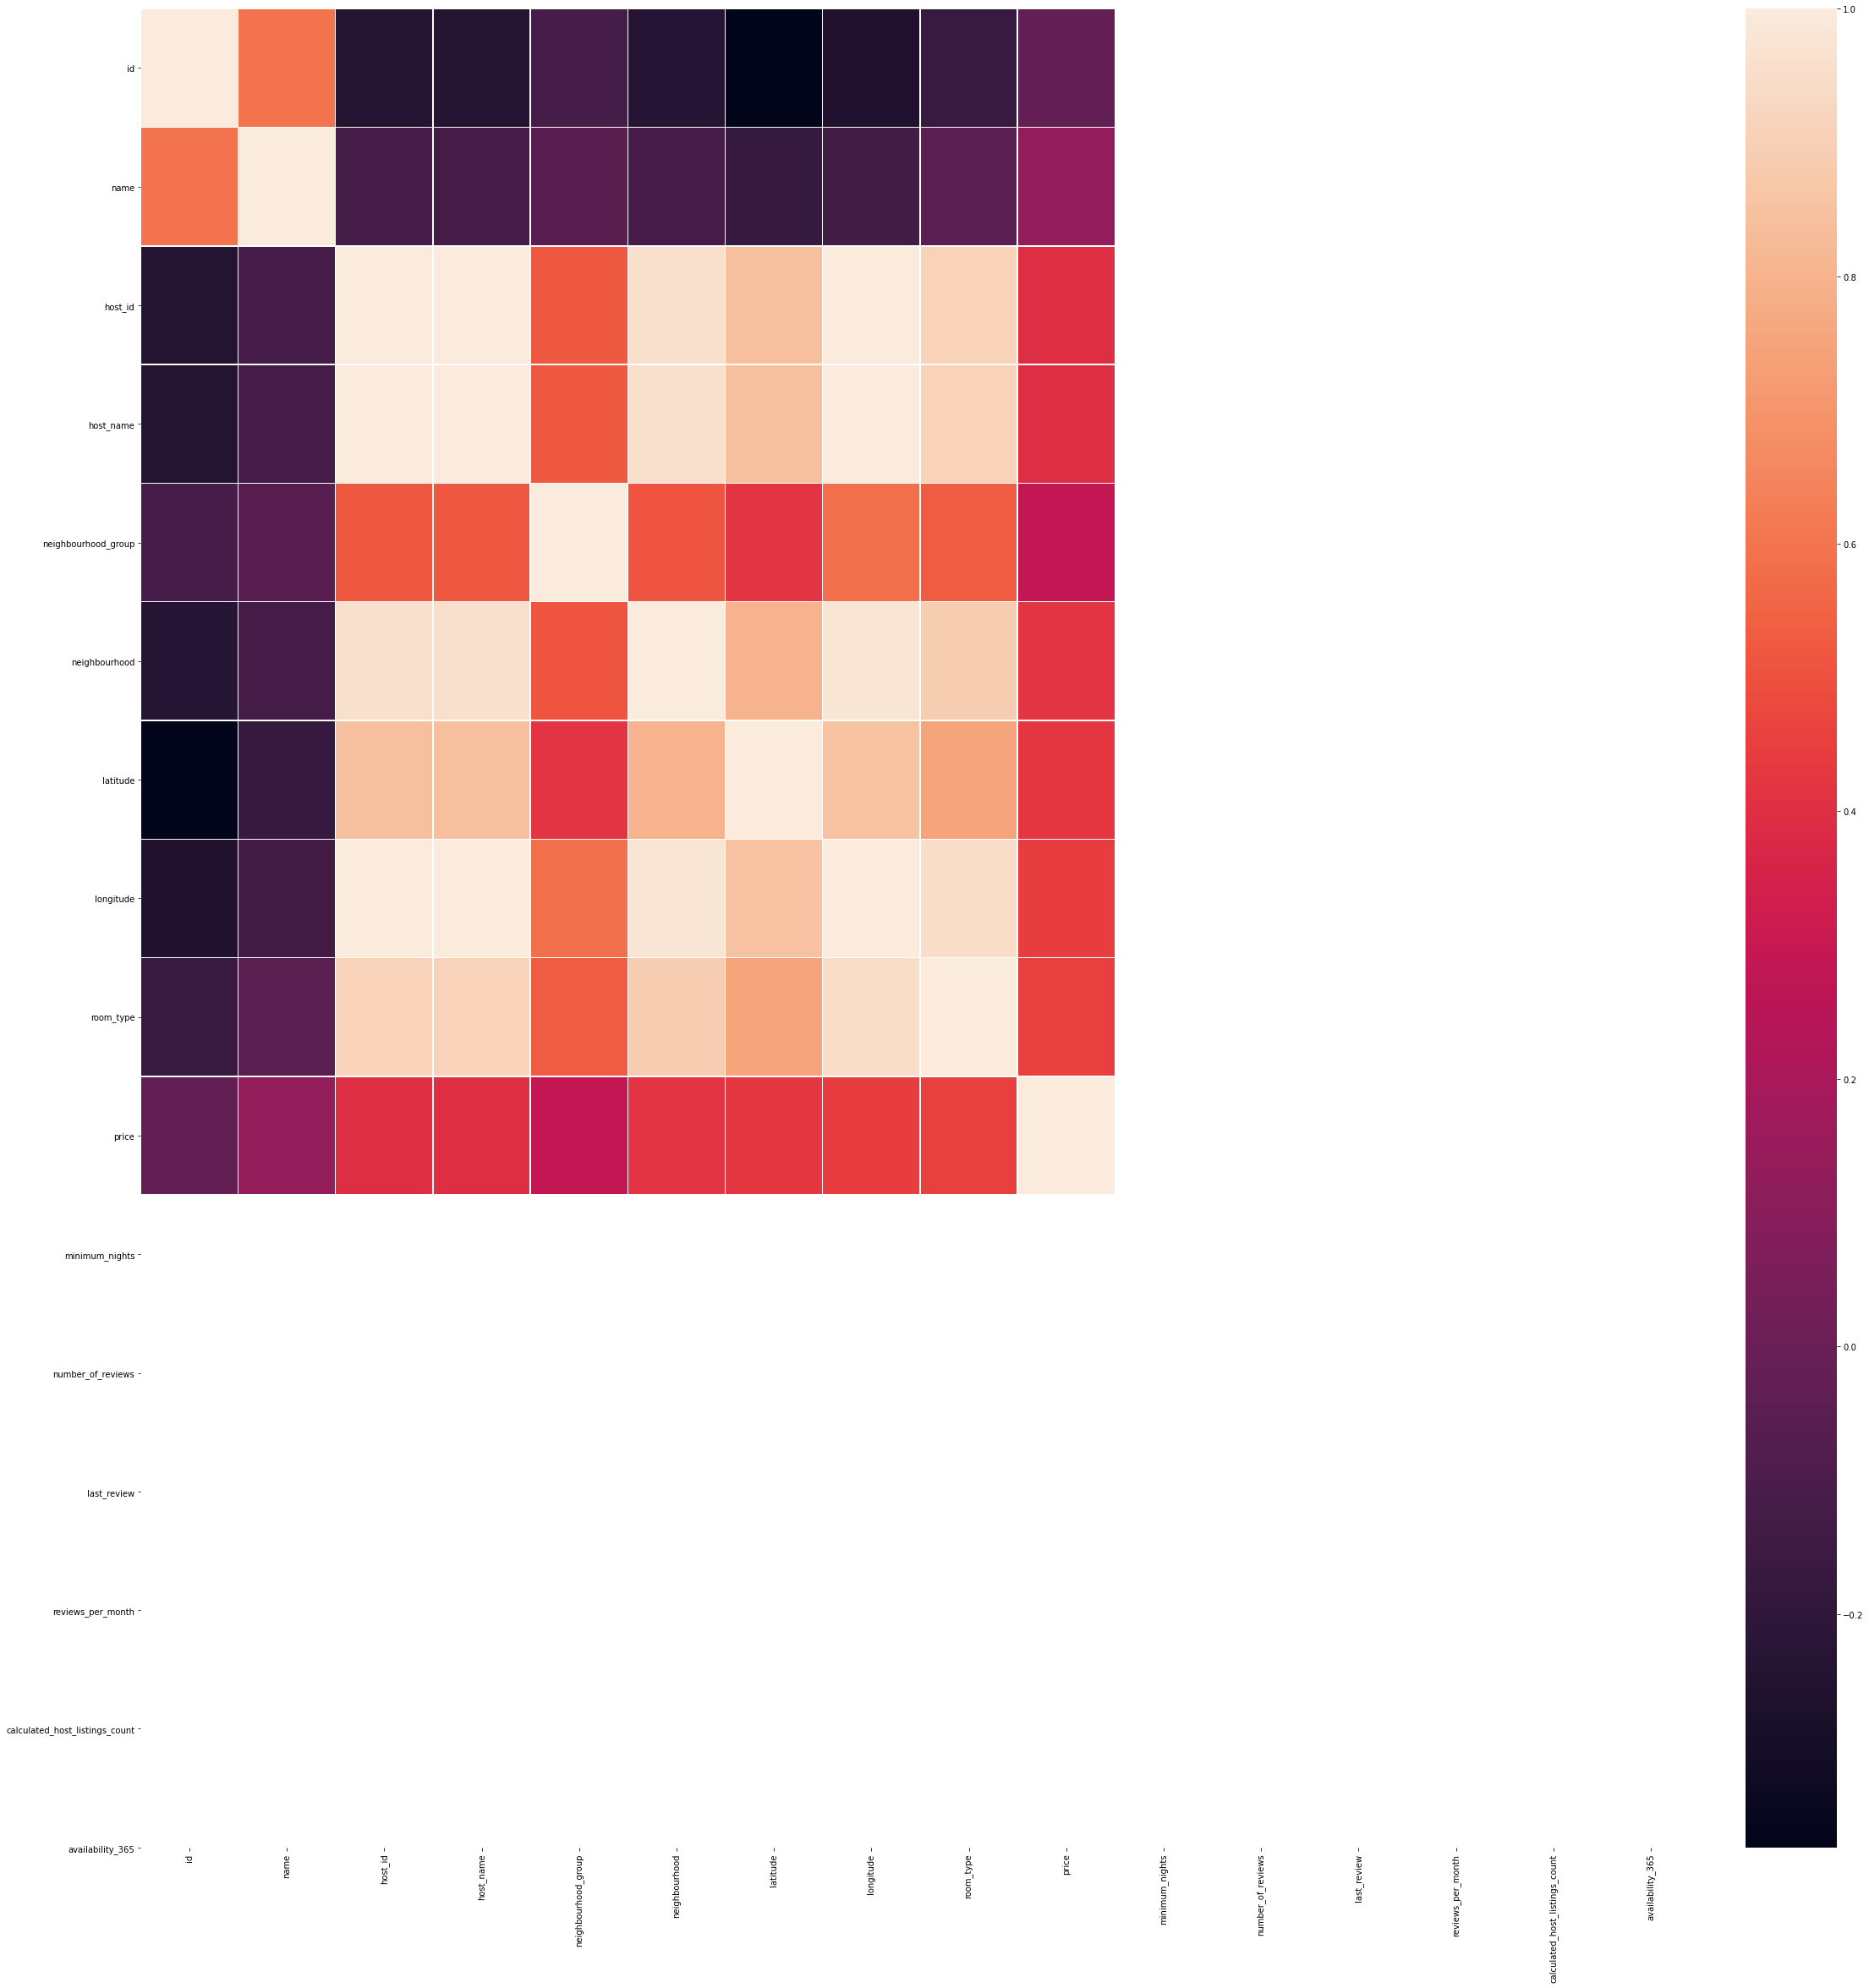

In [25]:
import seaborn as sns

figure(figsize=(40,40))


sns.heatmap(air_set.corr(), 
            xticklabels=air_set.columns.values, 
            yticklabels=air_set.columns.values, linewidths=.5)

In [26]:
air_set.corr()

id   host_id  latitude  longitude  \
id                              1.000000  0.594573 -0.245234  -0.245181   
host_id                         0.594573  1.000000 -0.124367  -0.124309   
latitude                       -0.245234 -0.124367  1.000000   1.000000   
longitude                      -0.245181 -0.124309  1.000000   1.000000   
price                          -0.119626 -0.057372  0.521681   0.521495   
minimum_nights                 -0.239975 -0.124936  0.962221   0.962206   
number_of_reviews              -0.374432 -0.179187  0.840818   0.840842   
reviews_per_month              -0.259942 -0.130373  0.999785   0.999787   
calculated_host_listings_count -0.170137 -0.050781  0.910280   0.910247   
availability_365               -0.024988  0.133158  0.397925   0.397980   

                                   price  minimum_nights  number_of_reviews  \
id                             -0.119626       -0.239975          -0.374432   
host_id                        -0.057372       -0.124936          -0.179187   
latitude                        0.521681        0.962221           0.840818   
longitude                       0.521495        0.962206           0.840842   
price                           1.000000        0.508701           0.416295   
minimum_nights                  0.508701        1.000000           0.797249   
number_of_reviews               0.416295        0.797249           1.000000   
reviews_per_month               0.583736        0.976777           0.851804   
calculated_host_listings_count  0.532628        0.890434           0.749183   
availability_365                0.281599        0.418969           0.422803   

                                reviews_per_month  \
id                                      -0.259942   
host_id                                 -0.130373   
latitude                                 0.999785   
longitude                                0.999787   
price                                    0.583736   
minimum_nights                           0.976777   
number_of_reviews                        0.851804   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.950992   
availability_365                         0.442315   

                                calculated_host_listings_count  \
id                                                   -0.170137   
host_id                                              -0.050781   
latitude                                              0.910280   
longitude                                             0.910247   
price                                                 0.532628   
minimum_nights                                        0.890434   
number_of_reviews                                     0.749183   
reviews_per_month                                     0.950992   
calculated_host_listings_count                        1.000000   
availability_365                                      0.448685   

                                availability_365  
id                                     -0.024988  
host_id                                 0.133158  
latitude                                0.397925  
longitude                               0.397980  
price                                   0.281599  
minimum_nights                          0.418969  
number_of_reviews                       0.422803  
reviews_per_month                       0.442315  
calculated_host_listings_count          0.448685  
availability_365                        1.000000

При нормализации переменной price у нас появились зависимости.

- minimum_nights: latitude = 0.96222
- number_of_reviews: latitude = 0.84081
- reviews_per_month:  latitude = 0.9997
- calculated_host_listings_count: latitude = 0.91028
- minimum_nights: longitude = 0.96220
- number_of_reviews: longitude = 0.84084
- reviews_per_month: longitude = 0.99787
- calculated_host_listings_count: longitude = 0.9102

---
Переменные latitude и longitude мы не будем использовать, поэтому не трогаем.


- reviews_per_month: minimum_nights = 0.9767
- reviews_per_month: number_of_reviews = 0.8518
- reviews_per_month: calculated_host_listings_count = 0.95099
- minimum_nights: calculated_host_listings_count = 0.8904




переведем в бинарный вид переменные и отсепарируем те, где количество значений меньше 150( Не влияют на наш прогноз)

In [27]:
ohe_n_group = pd.get_dummies(air_set['neighbourhood_group'], prefix='n_group')
ohe_n_group = ohe_n_group.loc[:, ohe_n_group.loc[:, :].sum() > 150]

ohe_neighbour = pd.get_dummies(air_set['neighbourhood'], prefix='neighbour')
ohe_neighbour = ohe_neighbour.loc[:, ohe_neighbour.loc[:, :].sum() > 150]

ohe_room_type = pd.get_dummies(air_set['room_type'], prefix='room_type')
ohe_room_type = ohe_room_type.loc[:, ohe_room_type.loc[:, :].sum() > 150]

air_set2 = air_set

air_set2 = pd.concat([air_set2, ohe_n_group, ohe_neighbour, ohe_room_type], axis=1,)


**Используя unsupervised learning метод считаем количество кластеров на основе переменной name.**

In [28]:
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from gensim.parsing.preprocessing import STOPWORDS

In [29]:
countvec = CountVectorizer(stop_words=list(STOPWORDS), max_df = 0.55, min_df=0.02)

air_set2.name = air_set2.name.fillna('none')

text = air_set2.name
text = [str(x) for x in text]

word_matrix = pd.DataFrame(
    countvec.fit_transform(text).toarray(), 
    columns=countvec.get_feature_names()
)
air_set2.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [30]:
display(word_matrix.shape)
word_matrix.head(10)

(48895, 46)

1br  500  apartment  apt  bath  beautiful  bed  bedroom  br  bright  ...  \
0    0    0          0    1     0          0    0        0   0       0  ...   
1    0    0          0    0     0          0    0        0   0       0  ...   
2    0    0          0    0     0          0    0        0   0       0  ...   
3    0    0          0    0     0          0    0        0   0       0  ...   
4    0    0          0    1     0          0    0        0   0       0  ...   
5    0    0          1    0     0          0    0        0   1       0  ...   
6    0    0          0    0     0          0    0        0   0       0  ...   
7    0    0          0    0     0          0    0        0   0       0  ...   
8    0    0          0    1     0          0    0        0   0       0  ...   
9    0    0          0    0     0          0    0        0   0       0  ...   

   room  spacious  square  studio  subway  sunny  upper  village  west  \
0     0         0       0       0       0      0      0        0     0   
1     0         0       0       0       0      0      0        0     0   
2     0         0       0       0       0      0      0        1     0   
3     0         0       0       0       0      0      0        0     0   
4     0         1       0       1       0      0      0        0     0   
5     0         0       0       0       0      0      0        0     0   
6     0         0       0       0       0      0      0        0     0   
7     1         0       0       0       0      0      0        0     0   
8     1         0       0       0       0      0      0        0     0   
9     0         0       0       0       0      0      0        0     0   

   williamsburg  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8             0  
9             0  

[10 rows x 46 columns]

**Пробуем через DBSCAN**

In [31]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist


In [32]:
X = word_matrix.iloc[:1000,:]

db = DBSCAN(eps=1, min_samples=20, n_jobs=-1, metric='manhattan').fit(X)

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1


Используя метод 'DBSCAN' мы нашли 1 кластер

In [33]:
X = word_matrix.iloc[:1000, ]# Взяли меньшую выборку что бы успеть все расчитать

distance_mat = pdist(X)

In [34]:
distance_mat.min(), distance_mat.max(), distance_mat.mean(), np.median(distance_mat)

(0.0, 4.123105625617661, 1.9781200839144717, 2.0)

**Пробуем через KMeans**

In [35]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
X = StandardScaler().fit_transform(word_matrix.values)

inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

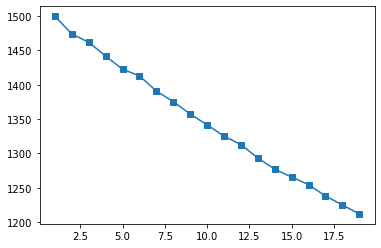

In [37]:
plt.plot(range(1, 20), inertia, marker='s')


**Пробуем через WARD метод.**

In [39]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

In [40]:
X = word_matrix#.iloc[:1000, ]# Взяли меньшую выборку что бы успеть все расчитать

distance_mat = pdist(X)

In [41]:
Z = hierarchy.linkage(distance_mat, method='ward', metric='manhattan') 

In [42]:
plt.figure(figsize=(20, 20))
dn = hierarchy.dendrogram(Z, color_threshold=60)

RecursionError: maximum recursion depth exceeded while getting the str of an object

<Figure size 1440x1440 with 0 Axes>

In [43]:
labels = fcluster(Z, 60, criterion='distance')
pd.value_counts(pd.Series(labels))

4    40865
1     4033
2     2707
3     1290
dtype: int64

In [44]:
pd.DataFrame({
    'text': text,
    'cluster': labels
})#.sort_values('cluster')

text  cluster
0                     Clean & quiet apt home by the park        4
1                                  Skylit Midtown Castle        4
2                    THE VILLAGE OF HARLEM....NEW YORK !        4
3                        Cozy Entire Floor of Brownstone        4
4       Entire Apt: Spacious Studio/Loft by central park        2
...                                                  ...      ...
48890    Charming one bedroom - newly renovated rowhouse        4
48891      Affordable room in Bushwick/East Williamsburg        4
48892            Sunny Studio at Historical Neighborhood        4
48893               43rd St. Time Square-cozy single bed        4
48894  Trendy duplex in the very heart of Hell's Kitchen        4

[48895 rows x 2 columns]

Используя метод 'WARD' мы нашли 4 кластера

**Вывод по переменной name: Мы протестировали 3 разных метода для нахождения кластеров в переменной name. 2 метода показали 1 кластер и WARD показал 4 кластера. попробуем WARD.**

In [45]:
air_set2['name_labels'] = labels

Добавим дополнительную колонку с определением языка, на котором было подано объявление

In [46]:
from langdetect import detect

In [47]:
air_set2['name_lang'] = air_set2['name'].apply(lambda x: detect(x) if isinstance(x, str) == True  and len(x) > 10 else 'none')

air_set2


id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  ...  neighbour_West Village  \
0      -73.97237     Private room    149  ...                       0   
1      -73.98377  Entire home/apt    225  ...                       0   
2      -73.94190     Private room    150  ...                       0   
3      -73.95976  Entire home/apt     89  ...                       0   
4      -73.94399  Entire home/apt     80  ...                       0   
...          ...              ...    ...  ...                     ...   
48890  -73.94995     Private room     70  ...                       0   
48891  -73.93317     Private room     40  ...                       0   
48892  -73.94867  Entire home/apt    115  ...                       0   
48893  -73.99112      Shared room     55  ...                       0   
48894  -73.98933     Private room     90  ...                       0   

       neighbour_Williamsburg neighbour_Windsor Terrace  neighbour_Woodside  \
0                           0                         0                   0   
1                           0                         0                   0   
2                           0                         0                   0   
3                           0                         0                   0   
4                           0                         0                   0   
...                       ...                       ...                 ...   
48890                       0                         0                   0   
48891                       0                         0                   0   
48892                       0                         0                   0   
48893                       0                         0                   0   
48894                       0                         0                   0   

       room_type_500  room_type_Entire home/apt  room_type_Private room  \
0                  0                          0                       1   
1                  0                          1                       0   
2                  0                          0                       1   
3                  0                 

In [48]:
display(air_set2.iloc[:,16:245])
display(air_set2)


n_group_500  n_group_Bronx  n_group_Brooklyn  n_group_Manhattan  \
0                0              0                 1                  0   
1                0              0                 0                  1   
2                0              0                 0                  1   
3                0              0                 1                  0   
4                0              0                 0                  1   
...            ...            ...               ...                ...   
48890            0              0                 1                  0   
48891            0              0                 1                  0   
48892            0              0                 0                  1   
48893            0              0                 0                  1   
48894            0              0                 0                  1   

       n_group_Queens  n_group_Staten Island  neighbour_500  \
0                   0                      0              0   
1                   0                      0              0   
2                   0                      0              0   
3                   0                      0              0   
4                   0                      0              0   
...               ...                    ...            ...   
48890               0                      0              0   
48891               0                      0              0   
48892               0                      0              0   
48893               0                      0              0   
48894               0                      0              0   

       neighbour_Astoria  neighbour_Bedford-Stuyvesant  neighbour_Boerum Hill  \
0                      0                             0                      0   
1                      0                             0                      0   
2                      0                             0                      0   
3                      0                             0                      0   
4                      0                             0                      0   
...                  ...                           ...                    ...   
48890                  0                             1                      0   
48891                  0                             0                      0   
48892                  0                             0                      0   
48893                  0                             0                      0   
48894                  0                             0                      0   

       ...  neighbour_West Village  neighbour_Williamsburg  \
0      ...                       0                       0   
1      ...                       0                       0   
2      ...                       0                       0   
3      ...                       0                       0   
4      ...                       0                       0   
...    ...                     ...                     ...   
48890  ...                       0                       0   
48891  ...                       0                       0   
48892  ...                       0                       0   
48893  ...                       0                       0   
48894  ...                       0                       0   

       neighbour_Windsor Terrace  neighbour_Woodside  room_type_500  \
0                              0                   0              0   
1                              0                   0              0   
2                              0                   0              0   
3                              0                   0              0   
4                              0                   0              0   
...                          ...                 ...            ...   
48890                          0                   0              0   
48891                          0                   0              0   
4889

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  ...  neighbour_West Village  \
0      -73.97237     Private room    149  ...                       0   
1      -73.98377  Entire home/apt    225  ...                       0   
2      -73.94190     Private room    150  ...                       0   
3      -73.95976  Entire home/apt     89  ...                       0   
4      -73.94399  Entire home/apt     80  ...                       0   
...          ...              ...    ...  ...                     ...   
48890  -73.94995     Private room     70  ...                       0   
48891  -73.93317     Private room     40  ...                       0   
48892  -73.94867  Entire home/apt    115  ...                       0   
48893  -73.99112      Shared room     55  ...                       0   
48894  -73.98933     Private room     90  ...                       0   

       neighbour_Williamsburg neighbour_Windsor Terrace  neighbour_Woodside  \
0                           0                         0                   0   
1                           0                         0                   0   
2                           0                         0                   0   
3                           0                         0                   0   
4                           0                         0                   0   
...                       ...                       ...                 ...   
48890                       0                         0                   0   
48891                       0                         0                   0   
48892                       0                         0                   0   
48893                       0                         0                   0   
48894                       0                         0                   0   

       room_type_500  room_type_Entire home/apt  room_type_Private room  \
0                  0                          0                       1   
1                  0                          1                       0   
2                  0                          0                       1   
3                  0                 

Считаем количество объявлений на каждом из языков. 
Количество объявлений меньше 150 - 0
Максимальное количество объявлений - 1
Все остальное - 2

In [49]:
display(air_set2['name_lang'].unique())
display(air_set2['name_lang'].value_counts())


lang_list = ['af', 'de', 'nl', 'fr', 'ro', 'vi', 'it', 'pl', 'ca', 'da']

air_set2['name_lang_bin'] = np.where(air_set2['name_lang'] == 'en', 1, np.where(air_set2['name_lang'].isin(lang_list), 2, 0))

array(['en', 'vi', 'de', 'et', 'fi', 'fr', 'da', 'af', 'id', 'ca', 'nl',
       'none', 'ro', 'sv', 'it', 'pt', 'tl', 'hu', 'pl', 'es', 'no', 'sw',
       'lv', 'lt', 'so', 'cy', 'sl', 'tr', 'hr', 'ko', 'sk', 'bg',
       'zh-cn', 'he', 'ru', 'ja', 'sq', 'cs', 'mk'], dtype=object)

en       40177
none      1542
af        1539
de        1450
nl        1320
fr         453
ro         439
it         201
vi         198
pl         159
ca         154
es         148
da         147
et         127
no         125
sv         110
tl          95
so          90
pt          72
cy          66
id          61
fi          43
zh-cn       42
tr          23
sw          16
ko          15
sk          14
sl          12
hu          12
sq           8
ja           8
hr           7
lt           6
cs           4
bg           4
lv           3
ru           3
mk           1
he           1
Name: name_lang, dtype: int64

In [50]:
air_set2[['name_lang', 'name_lang_bin']]

name_lang  name_lang_bin
0            en              1
1            en              1
2            vi              2
3            en              1
4            en              1
...         ...            ...
48890        en              1
48891        en              1
48892        en              1
48893        en              1
48894        en              1

[48895 rows x 2 columns]

In [51]:
air_set2['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

Трансформируем дату в количество дней тому назад.

In [52]:
air_set2['last_review_days'] = (pd.to_datetime('today') - pd.to_datetime(air_set2['last_review'].values))#.astype(int)/86400000000000
air_set2['last_review_days'] = air_set2['last_review_days'].dt.components['days']
air_set2['last_review_days'].describe()

count    39265.000000
mean      1195.478187
std       2893.880407
min        445.000000
25%        460.000000
50%        499.000000
75%        869.000000
max      18530.000000
Name: last_review_days, dtype: float64

In [53]:
air_set2['last_review_days'].describe()
air_set2['last_review_days'].fillna(-1, inplace=True)
air_set2['reviews_per_month'].fillna(-1, inplace=True)

In [54]:
air_set2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   48895 non-null  int64  
 1   name                                 48895 non-null  object 
 2   host_id                              48895 non-null  int64  
 3   host_name                            48874 non-null  object 
 4   neighbourhood_group                  48895 non-null  object 
 5   neighbourhood                        48895 non-null  object 
 6   latitude                             48895 non-null  float64
 7   longitude                            48895 non-null  float64
 8   room_type                            48895 non-null  object 
 9   price                                48895 non-null  int64  
 10  minimum_nights                       48895 non-null  int64  
 11  number_of_reviews           

In [55]:
air_set2.drop(['host_name', 'latitude', 'longitude', 'id', 'name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'host_id', 'name_lang'], axis=1, inplace=True)

In [56]:
air_set2.select_dtypes(include='object')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[48895 rows x 0 columns]

**Мы убрали все object переменные и у нас остались только переменные числового типа.**

**Теперь мы можем наш датасет полностью нормализовать.**

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

scaler_air_set2 = pd.DataFrame(scaler.fit_transform(air_set2), columns=air_set2.columns)

In [59]:
scaler_air_set2

price  minimum_nights  number_of_reviews  reviews_per_month  \
0      0.298        0.000000           0.014308           0.002415   
1      0.450        0.000000           0.071542           0.002754   
2      0.300        0.001601           0.000000           0.000000   
3      0.178        0.000000           0.429253           0.011257   
4      0.160        0.007206           0.014308           0.002196   
...      ...             ...                ...                ...   
48890  0.140        0.000801           0.000000           0.000000   
48891  0.080        0.002402           0.000000           0.000000   
48892  0.230        0.007206           0.000000           0.000000   
48893  0.110        0.000000           0.000000           0.000000   
48894  0.180        0.004804           0.000000           0.000000   

       calculated_host_listings_count  availability_365  n_group_500  \
0                            0.010020             0.730          0.0   
1                            0.002004             0.710          0.0   
2                            0.000000             0.730          0.0   
3                            0.000000             0.388          0.0   
4                            0.000000             0.000          0.0   
...                               ...               ...          ...   
48890                        0.002004             0.018          0.0   
48891                        0.002004             0.072          0.0   
48892                        0.000000             0.054          0.0   
48893                        0.010020             0.004          0.0   
48894                        0.000000             0.046          0.0   

       n_group_Bronx  n_group_Brooklyn  n_group_Manhattan  ...  \
0                0.0               1.0                0.0  ...   
1                0.0               0.0                1.0  ...   
2                0.0               0.0                1.0  ...   
3                0.0               1.0                0.0  ...   
4                0.0               0.0                1.0  ...   
...              ...               ...                ...  ...   
48890            0.0               1.0                0.0  ...   
48891            0.0               1.0                0.0  ...   
48892            0.0               0.0                1.0  ...   
48893            0.0               0.0                1.0  ...   
48894            0.0               0.0                1.0  ...   

       neighbour_Williamsburg  neighbour_Windsor Terrace  neighbour_Woodside  \
0                         0.0                        0.0                 0.0   
1                         0.0                        0.0                 0.0   
2                         0.0                        0.0                 0.0   
3                         0.0                        0.0                 0.0   
4                         0.0                        0.0                 0.0   
...                       ...                        ...                 ...   
48890                     0.0                        0.0                 0.0   
48891                     0.0                        0.0                 0.0   
48892                     0.0                        0.0                 0.0   
48893                     0.0                        0.0                 0.0   
48894                     0.0                        0.0                 0.0   

       room_type_500  room_type_Entire home/apt  room_type_Private room  \
0                0.0                        0.0                     1.0   
1                0.0                        1.0                     0.0   
2                0.0                        0.0                     1.0   
3                0.0                        1.0                     0.0   
4                0.0                        1.0                     0.0   
...              ...                        ...                     ...   
48890            0.0  

Прогоним наш датасет по тестам нормализации, которые работают с метричными переменными.


In [60]:
from scipy.stats import kstest
from scipy.stats import shapiro

data_columns = ['price', 'minimum_nights', 'reviews_per_month', 'availability_365']

# my_data = pd.DataFrame(scaler_air_set2, columns=data_columns)

for column in data_columns:

    ks_statistic, p_value = kstest(scaler_air_set2[column], 'norm')
    print('Kolmogorov Smirnov test for {} is {}'.format(column, 'approved' if p_value < 0.05 else 'not approved' ))
    
    sw_statistic, p_value = shapiro(scaler_air_set2.loc[:4999, column])
    print('Shapiro-Wilk test for {} is {}'.format(column, 'approved' if p_value < 0.05 else 'not approved' ))



Kolmogorov Smirnov test for price is approved
Shapiro-Wilk test for price is approved
Kolmogorov Smirnov test for minimum_nights is approved
Shapiro-Wilk test for minimum_nights is approved
Kolmogorov Smirnov test for reviews_per_month is approved
Shapiro-Wilk test for reviews_per_month is approved
Kolmogorov Smirnov test for availability_365 is approved
Shapiro-Wilk test for availability_365 is approved


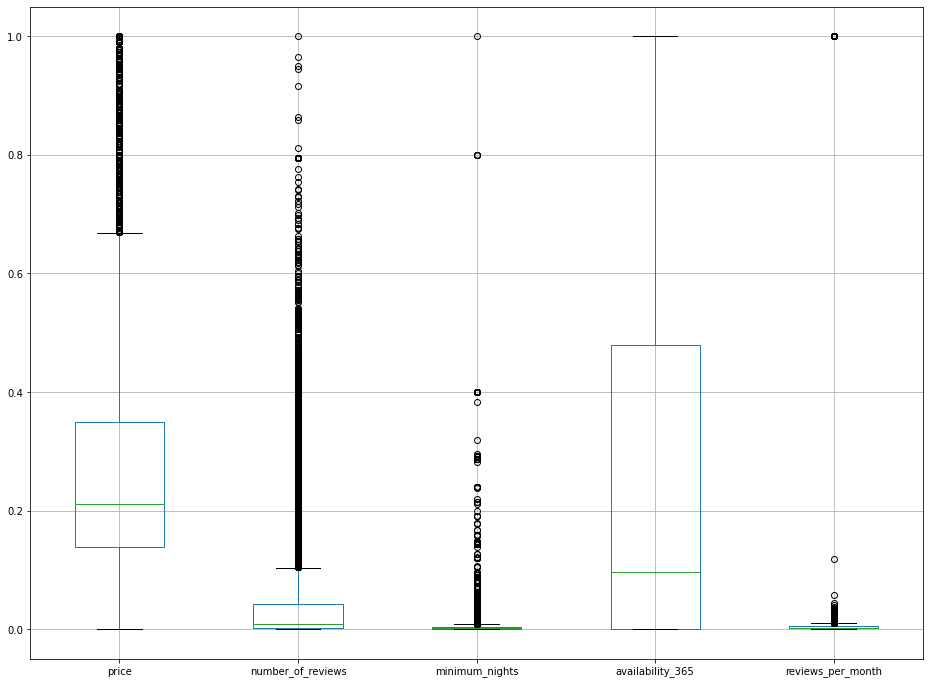

In [61]:
plt.figure(figsize = (16, 12))

scaler_air_set2.boxplot(column=['price', 'number_of_reviews', 'minimum_nights', 'availability_365', 'reviews_per_month'])

In [62]:
stats.kurtosis(scaler_air_set2['price']), stats.skew(scaler_air_set2['price'])

(3.1450691801461117, 1.7494629508752009)

In [63]:
scaler_air_set2.loc[:,['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'last_review_days']].corr()

price  minimum_nights  number_of_reviews  \
price                           1.000000        0.508701           0.416295   
minimum_nights                  0.508701        1.000000           0.797249   
number_of_reviews               0.416295        0.797249           1.000000   
reviews_per_month               0.520177        0.961017           0.848379   
calculated_host_listings_count  0.532628        0.890434           0.749183   
availability_365                0.281599        0.418969           0.422803   
last_review_days                0.504601        0.945339           0.822568   

                                reviews_per_month  \
price                                    0.520177   
minimum_nights                           0.961017   
number_of_reviews                        0.848379   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.909296   
availability_365                         0.401390   
last_review_days                         0.984200   

                                calculated_host_listings_count  \
price                                                 0.532628   
minimum_nights                                        0.890434   
number_of_reviews                                     0.749183   
reviews_per_month                                     0.909296   
calculated_host_listings_count                        1.000000   
availability_365                                      0.448685   
last_review_days                                      0.888589   

                                availability_365  last_review_days  
price                                   0.281599          0.504601  
minimum_nights                          0.418969          0.945339  
number_of_reviews                       0.422803          0.822568  
reviews_per_month                       0.401390          0.984200  
calculated_host_listings_count          0.448685          0.888589  
availability_365                        1.000000          0.358780  
last_review_days                        0.358780          1.000000


- reviews_per_month: minimum_nights = 0.961017
- reviews_per_month: number_of_reviews = 0.848379

- last_review_days: minimum_nights = 0.945359
- last_review_days: number_of_reviews = 0.822560
- last_review_days: reviews_per_month = 0.984213
- last_review_days: calculated_host_listings_count = 0.888610

- calculated_host_listings_count: minimum_nights = 0.890434
- calculated_host_listings_count: reviews_per_month = 0.909296

Надо убирать связь между переменными

In [64]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

lr = LinearRegression(normalize=True)

In [65]:
x = scaler_air_set2['reviews_per_month'].values.reshape(-1,1)
y = scaler_air_set2['minimum_nights'].values.reshape(-1,1)

lr.fit(x, y)

r_m_pred = lr.predict(x)

print("Mean squared error: %.2f" % mean_squared_error(y, r_m_pred))
print('Variance score: %.2f' % r2_score(y, r_m_pred))
print('Before: ', round(stats.pearsonr(x.flatten(), y.flatten())[0],5))
print('After: ', round(stats.pearsonr(x.flatten(), y.flatten() - r_m_pred.flatten())[0],5))

scaler_air_set2['minimum_nights'] = y.flatten() - r_m_pred.flatten()

Mean squared error: 0.00
Variance score: 0.92
Before:  0.96102
After:  0.0


In [66]:
x_1 = scaler_air_set2['number_of_reviews'].values.reshape(-1,1)
y_1 = scaler_air_set2['last_review_days'].values.reshape(-1,1)

lr.fit(x_1, y_1)

n_l_pred = lr.predict(x_1)

print("Mean squared error: %.2f" % mean_squared_error(y_1, n_l_pred))
print('Variance score: %.2f' % r2_score(y_1, n_l_pred))
print('Before: ', round(stats.pearsonr(x_1.flatten(), y_1.flatten())[0],5))
print('After: ', round(stats.pearsonr(x_1.flatten(), y_1.flatten() - n_l_pred.flatten())[0],5))

scaler_air_set2['last_review_days'] = y_1.flatten() - n_l_pred.flatten()

Mean squared error: 0.01
Variance score: 0.68
Before:  0.82257
After:  0.0


In [67]:
x_2 = scaler_air_set2['number_of_reviews'].values.reshape(-1,1)
y_2 = scaler_air_set2['reviews_per_month'].values.reshape(-1,1)

lr.fit(x_2, y_2)

n_r_pred = lr.predict(x_2)

print("Mean squared error: %.2f" % mean_squared_error(y_2, n_r_pred))
print('Variance score: %.2f' % r2_score(y_2, n_r_pred))
print('Before: ', round(stats.pearsonr(x_2.flatten(), y_2.flatten())[0],5))
print('After: ', round(stats.pearsonr(x_2.flatten(), y_2.flatten() - n_r_pred.flatten())[0],5))

scaler_air_set2['last_review_days'] = y_2.flatten() - n_r_pred.flatten()

Mean squared error: 0.01
Variance score: 0.72
Before:  0.84838
After:  -0.0


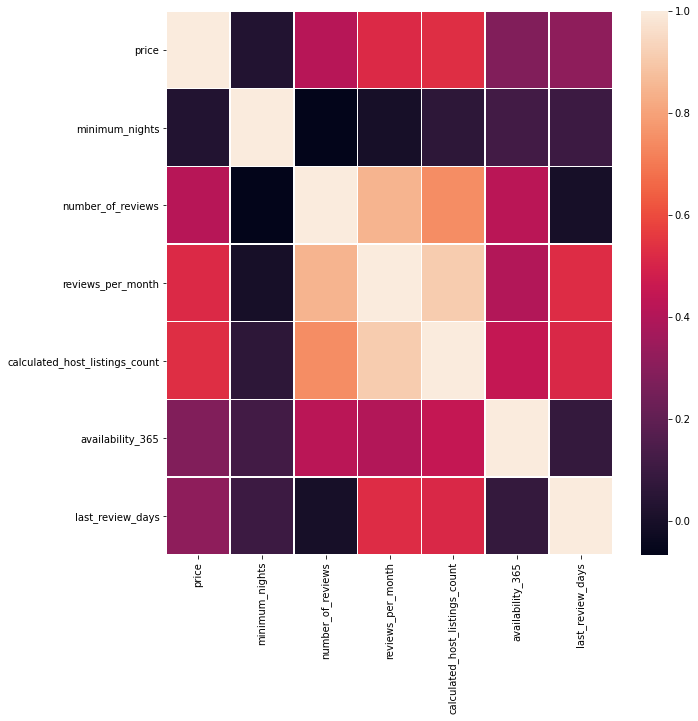

In [68]:

figure(figsize=(10,10))
scaler_air_set2_min = scaler_air_set2.loc[:,['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'last_review_days']]

sns.heatmap(scaler_air_set2_min.corr(), 
            xticklabels=scaler_air_set2_min.columns.values, 
            yticklabels=scaler_air_set2_min.columns.values, linewidths=.5)

# scaler_air_set2.columns76

Мы нормализовали наш датасет и проверили несколько переменных(в том числе Таргет) на соответствие H0. Наш таргет соответствует нормальному закону распределения.

In [69]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split


**Метод Knn**

In [70]:

X = air_set2.loc[:, air_set2.columns != 'price']
y = air_set2['price']



print(f'X.shape:{X.shape}\ny.shape:{y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# scaler = preprocessing.StandardScaler().fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

knn = neighbors.KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

X.shape:(48895, 73)
y.shape:(48895,)


In [71]:
display(y_pred.shape)
y_pred.mean(), y_pred.max(), y_pred.min() 

(9779,)

(138.82392371408122, 500.0, 41.85)

Оценим качество нашей модели через разные метрики

In [72]:
def RMSE(y_test, y_pred):
    return (sum((y_test - y_pred)**2)/len(y_test))**(0.5)


def MAE(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))


def mape(y_test, y_pred): 
    return np.mean(np.abs((y_test+1 - y_pred) / (y_test+1))) * 100

In [73]:
RMSE(y_test, knn.predict(X_test)), mape(y_test, knn.predict(X_test)),  MAE(y_test, knn.predict(X_test))

(80.36880515001717, 62.46675816783661, 59.532216995602795)

**Линейная регрессия**

In [74]:
lin_reg = LinearRegression(n_jobs=-1, normalize=True)

lin_reg.fit(X_train, y_train)

lin_reg.intercept_, lin_reg.coef_

(-181620966094786.28,
 array([-2.68272906e-01, -8.99454074e-02, -8.32853420e-01,  2.17834145e-02,
         8.43689655e-02, -9.07299834e+14,  5.47654308e+13,  5.47654308e+13,
         5.47654308e+13,  5.47654308e+13,  5.47654308e+13,  5.15764896e+14,
         1.01953277e+01, -1.25847233e+00,  3.69149853e+01, -2.83424458e+00,
         3.82940201e+01,  7.14620519e-01, -3.24371203e+01,  2.29745307e+01,
         3.37947171e+00,  5.96425269e+00,  1.01571456e+00, -1.13815973e+01,
        -5.51124062e+01, -1.90066243e+01, -1.86697366e+01,  3.95745988e+00,
        -1.01447570e+01, -8.19862226e+00,  8.70407994e+00,  3.05154716e+01,
         3.89693039e+01, -2.01834111e+01,  2.47280644e+01,  7.56357104e+00,
        -6.24263061e+01, -7.75977587e+00, -8.79655031e+01, -1.77341618e+00,
         5.67188411e+00, -4.99876770e+00, -2.74403824e+01,  2.91430742e+01,
        -2.88783963e+01,  1.89228088e+01, -6.06244149e+01, -1.60093624e+01,
        -2.16931547e+00,  3.43107687e+01,  2.33308498e+01, -9.8995

In [75]:
pred_y = lin_reg.predict(X_test)

In [76]:
RMSE(y_test, pred_y), mape(y_test, pred_y),  MAE(y_test, pred_y)

(63.74206027874801, 37.40486958241141, 43.46704034154821)

**Полиномиальная регрессия**

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
poly_features.fit(X_train)
lin_reg = LinearRegression(n_jobs=-1)
X_poly_train = poly_features.transform(X_train)
X_poly_test = poly_features.transform(X_test)
lin_reg.fit(X_poly_train, y_train)
lin_reg.intercept_, lin_reg.coef_, lin_reg.get_params

(65.83031836775658,
 array([-9.66309030e-01, -6.41740427e-02, -6.18872515e+00, ...,
        -1.78034227e+00, -1.84024180e-03,  1.01792897e-05]),
 <bound method BaseEstimator.get_params of LinearRegression(n_jobs=-1)>)

In [79]:
print(lin_reg.predict(X_poly_test))

[ 79.78023231 185.71515047  78.04540152 ...  45.6274865  136.05452621
  26.03391806]


In [80]:
RMSE(y_test, lin_reg.predict(X_poly_test)), mape(y_test, lin_reg.predict(X_poly_test)),  MAE(y_test, lin_reg.predict(X_poly_test))

(62.89784389058722, 35.982832214781794, 42.14895887342783)

В данном тесте у нас Knn отработала хуже всего.

На втором месте идет Линейная регрессия

На первом - Полиномиальная.

Перейдем к более мощным моделям.

**Рассмотрим DecisionTreeRegressor**

In [81]:
from sklearn.metrics import r2_score,mean_squared_error
# from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [82]:
dt_reg = DecisionTreeRegressor(
    criterion='mse',
    max_depth=12, 
    min_samples_leaf=30, 
    max_features=0.9, 
    random_state=1)

dt_reg.fit(X_train, y_train)


y_pred = dt_reg.predict(X_test)

print("RMSE:",  RMSE(y_test, y_pred), 
          "MAPE:", mape(y_test, y_pred), 
          "R^2:", r2_score(y_test, y_pred))

RMSE: 62.63673362317254 MAPE: 35.56423098095367 R^2: 0.5980674988474737


На данный момент DecisionTreeRegressor сопоставим по своей эффективности с Полиномиальной регрессией. 

Попробуем улучшить с помощью from BaggingRegressor.

In [83]:
from sklearn.ensemble import BaggingRegressor

In [84]:
for i in [0.85, 0.9, 0.95]:
    dt_reg = BaggingRegressor(DecisionTreeRegressor(criterion='mse', 
                                                    max_depth=18, 
                                                    min_samples_leaf=29, 
                                                    max_features=i, 
                                                    random_state=1), 
                              random_state=1)
    dt_reg.fit(X_train, y_train)
    y_pred = dt_reg.predict(X_test)
    print(i, "- RMSE:",  RMSE(y_test, y_pred), "MAPE:", mape(y_test, y_pred), "R^2:", r2_score(y_test, y_pred))

0.85 - RMSE: 61.429341171022706 MAPE: 35.156243477707996 R^2: 0.6134135421838789
0.9 - RMSE: 61.53867049101897 MAPE: 35.17767771864803 R^2: 0.6120362574962428
0.95 - RMSE: 61.45159547479994 MAPE: 35.231317645020496 R^2: 0.6131333903649616


По MAPE результат улучшился, но просел по RMSE

**Попробуем применить LGBM для нашей задачи**

In [85]:
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV
from scipy.stats import randint as sp_randint


In [86]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [90]:
import lightgbm as lgb
from hyperopt import STATUS_OK

N_FOLDS = 10

# Create the dataset
train_set = lgb.Dataset(X_train, y_train)

def objective(params, n_folds = N_FOLDS):
    """Objective function for Gradient Boosting Machine Hyperparameter Tuning"""
    
    # Perform n_fold cross validation with hyperparameters
    # Use early stopping and evalute based on ROC AUC
    cv_results = lgb.cv(params, train_set, nfold = n_folds, num_boost_round = 10000, 
                        early_stopping_rounds = 100, metrics = 'mape', seed = 50)
  
    # Extract the best score
    best_score = max(cv_results['mape-mean'])
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [107]:
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'regression_l1', 'metric':'mape'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
#         params['bagging_fraction'] = max(min(bagging_fraction, 0.5), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['mape'])
        return max(cv_result['mape-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (10, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 0.5)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_mape=[]
    for model in range(len( lgbBO.res)):
        model_mape.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_mape).idxmax()]['target'],lgbBO.res[pd.Series(model_mape).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X, y, init_round=5, opt_round=10, n_folds=3, random_seed=6,n_estimators=10000)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 32596, number of used features: 73


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
|  3        |  0.3566   |  0.8192   |  0.8548   |  0.8278   |  56.28    |  26.84    |  54.7     |  45.01    |  57.61    |  0.

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
|  4        |  0.5622   |  0.9281   |  0.5869   |  0.1144   |  87.62    |  23.97    |  60.78    |  32.93    |  11.85    |  0.4038   |
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 32596, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[Lig

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


|  6        |  0.4773   |  0.8781   |  0.7717   |  0.3244   |  46.51    |  25.74    |  20.7     |  36.02    |  76.68    |  0.2698   |
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 32596, number of used features: 73


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
|  7        |  0.4237   |  0.9021   |  0.8837   |  0.5406   |  83.81    |  29.83    |  66.22    |  34.02    |  10.89    |  0.

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Info] Start training from score 106.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

|  8        |  0.5785   |  0.841    |  0.3762   |  0.179    |  39.68    |  9.308    |  43.79    |  68.13    |  47.76    |  0.2064   |
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 32596, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


|  9        |  0.5912   |  0.8      |  0.525    |  0.01     |  46.12    |  9.761    |  40.95    |  69.83    |  46.14    |  0.01     |
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 32596, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
|  11       |  0.5912   |

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


|  13       |  0.5911   |  0.8      |  0.4565   |  0.01     |  44.03    |  18.53    |  42.13    |  74.46    |  57.69    |  0.01     |
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 32596, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 32597, number of used features: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


|  15       |  0.5913   |  0.8068   |  0.6033   |  0.01     |  90.0     |  9.656    |  62.96    |  21.64    |  10.0     |  0.5      |


In [108]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='regression_l1'
opt_params[1]['metric']='mape'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.9762604725071116,
 'feature_fraction': 0.1,
 'learning_rate': 0.01,
 'max_bin': 90,
 'max_depth': 13,
 'min_data_in_leaf': 51,
 'min_sum_hessian_in_leaf': 31.048014997831178,
 'num_leaves': 13,
 'subsample': 0.5,
 'objective': 'regression_l1',
 'metric': 'mape',
 'is_unbalance': True,
 'boost_from_average': False}

In [109]:
from scipy.stats import randint as sp_randint


train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

parameters = {
    'objective': 'regression_l1',
    'metric': 'mape',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'learning_rate': 0.02,
    'verbose': 0
}

# opt_params = {
#     'bagging_fraction': 0.9280786928822388,
#      'feature_fraction': 0.5869250335390612,
#      'learning_rate': 0.11437976620936573,
#      'max_bin': 88,
#      'max_depth': 24,
#      'min_data_in_leaf': 61,
#      'min_sum_hessian_in_leaf': 32.93481038105413,
#      'num_leaves': 25,
#      'subsample': 0.805623782185316,
#      'objective': 'regression_l1',
#      'metric': 'mape',
#      'is_unbalance': True,
#      'boost_from_average': False}

lgb_model = lightgbm.train(opt_params,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=500)

[LightGBM] [Warning] bagging_fraction is set=0.9762604725071116, subsample=0.5 will be ignored. Current value: bagging_fraction=0.9762604725071116
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] bagging_fraction is set=0.9762604725071116, subsample=0.5 will be ignored. Current value: bagging_fraction=0.9762604725071116
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 39116, number of used features: 73
[LightGBM] [Warning] bagging_fraction is set=0.9762604725071116, subsample=0.5 will be ignored. Current value: bagging_fraction=0.9762604725071116
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Disabling boost_from_average in regression_l1 may cause the slow convergence
[LightGBM]

[166]	valid_0's mape: 0.384346
[167]	valid_0's mape: 0.384413
[168]	valid_0's mape: 0.384638
[169]	valid_0's mape: 0.384733
[170]	valid_0's mape: 0.384912
[171]	valid_0's mape: 0.385094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[172]	valid_0's mape: 0.385165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[173]	valid_0's mape: 0.385487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[174]	valid_0's mape: 0.385703
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[175]	valid_0's mape: 0.385885
[176]	valid_0's mape: 0.386083
[177]	valid_0's mape: 0.386213
[178]	valid_0's mape: 0.386402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[179]	valid_0's mape: 0.386675
[180]	valid_0's mape: 0.386897
[181]	valid_0's mape: 0.387333
[182]	valid_0's mape: 0.386022
[183]	valid_0's mape: 0.384921
[184]	valid_0's mape: 0.384311
[185]	valid_0's mape: 0.384259
[Ligh

[362]	valid_0's mape: 0.370086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[363]	valid_0's mape: 0.3701
[364]	valid_0's mape: 0.370098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[365]	valid_0's mape: 0.370172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[366]	valid_0's mape: 0.370175
[367]	valid_0's mape: 0.370188
[368]	valid_0's mape: 0.370086
[369]	valid_0's mape: 0.370019
[370]	valid_0's mape: 0.369977
[371]	valid_0's mape: 0.369968
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[372]	valid_0's mape: 0.369819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[373]	valid_0's mape: 0.369814
[374]	valid_0's mape: 0.369757
[375]	valid_0's mape: 0.369696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[376]	valid_0's mape: 0.369583
[377]	valid_0's mape: 0.369555
[LightGBM] [Warning] No further splits with positive gai

[505]	valid_0's mape: 0.355439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[506]	valid_0's mape: 0.355445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[507]	valid_0's mape: 0.355462
[508]	valid_0's mape: 0.355169
[509]	valid_0's mape: 0.355079
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[510]	valid_0's mape: 0.355042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[511]	valid_0's mape: 0.355052
[512]	valid_0's mape: 0.354598
[513]	valid_0's mape: 0.354508
[514]	valid_0's mape: 0.354433
[515]	valid_0's mape: 0.354326
[516]	valid_0's mape: 0.354131
[517]	valid_0's mape: 0.354062
[518]	valid_0's mape: 0.353972
[519]	valid_0's mape: 0.35389
[520]	valid_0's mape: 0.353534
[521]	valid_0's mape: 0.353467
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[522]	valid_0's mape: 0.353473
[523]	valid_0's mape: 0.353268
[524]	valid_0's mape: 0.353125
[525]	

[639]	valid_0's mape: 0.341204
[640]	valid_0's mape: 0.34114
[641]	valid_0's mape: 0.34103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[642]	valid_0's mape: 0.341007
[643]	valid_0's mape: 0.340901
[644]	valid_0's mape: 0.340851
[645]	valid_0's mape: 0.340693
[646]	valid_0's mape: 0.340612
[647]	valid_0's mape: 0.340538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[648]	valid_0's mape: 0.340545
[649]	valid_0's mape: 0.340513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[650]	valid_0's mape: 0.340452
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[651]	valid_0's mape: 0.340424
[652]	valid_0's mape: 0.340387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[653]	valid_0's mape: 0.34038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[654]	valid_0's mape: 0.340274
[655]	valid_0's mape: 0.340189
[656]	valid_0's mape: 0.34

[925]	valid_0's mape: 0.323927
[926]	valid_0's mape: 0.323839
[927]	valid_0's mape: 0.323846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[928]	valid_0's mape: 0.323845
[929]	valid_0's mape: 0.323825
[930]	valid_0's mape: 0.32381
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[931]	valid_0's mape: 0.323768
[932]	valid_0's mape: 0.323742
[933]	valid_0's mape: 0.323683
[934]	valid_0's mape: 0.323539
[935]	valid_0's mape: 0.32352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[936]	valid_0's mape: 0.323537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[937]	valid_0's mape: 0.323513
[938]	valid_0's mape: 0.323492
[939]	valid_0's mape: 0.323457
[940]	valid_0's mape: 0.323348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[941]	valid_0's mape: 0.323339
[942]	valid_0's mape: 0.323318
[LightGBM] [Warning] No further splits with positive gain, best gain:

[1070]	valid_0's mape: 0.319359
[1071]	valid_0's mape: 0.319321
[1072]	valid_0's mape: 0.319279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1073]	valid_0's mape: 0.319271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1074]	valid_0's mape: 0.319245
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1075]	valid_0's mape: 0.319238
[1076]	valid_0's mape: 0.319127
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1077]	valid_0's mape: 0.319099
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1078]	valid_0's mape: 0.319095
[1079]	valid_0's mape: 0.319083
[1080]	valid_0's mape: 0.318959
[1081]	valid_0's mape: 0.318921
[1082]	valid_0's mape: 0.318915
[1083]	valid_0's mape: 0.318872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1084]	valid_0's mape: 0.318882
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[1278]	valid_0's mape: 0.314414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1279]	valid_0's mape: 0.31441
[1280]	valid_0's mape: 0.314347
[1281]	valid_0's mape: 0.314338
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1282]	valid_0's mape: 0.314332
[1283]	valid_0's mape: 0.314322
[1284]	valid_0's mape: 0.314317
[1285]	valid_0's mape: 0.314297
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1286]	valid_0's mape: 0.31429
[1287]	valid_0's mape: 0.314274
[1288]	valid_0's mape: 0.314223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1289]	valid_0's mape: 0.314231
[1290]	valid_0's mape: 0.314225
[1291]	valid_0's mape: 0.314222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1292]	valid_0's mape: 0.31422
[1293]	valid_0's mape: 0.314196
[1294]	valid_0's mape: 0.314175
[1295]	valid_0's mape: 0.314169
[1296]	valid_0's mape: 0.314143
[1297]	valid_0's map

[1424]	valid_0's mape: 0.31234
[1425]	valid_0's mape: 0.312316
[1426]	valid_0's mape: 0.31231
[1427]	valid_0's mape: 0.312278
[1428]	valid_0's mape: 0.312254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1429]	valid_0's mape: 0.31225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1430]	valid_0's mape: 0.312234
[1431]	valid_0's mape: 0.31221
[1432]	valid_0's mape: 0.312192
[1433]	valid_0's mape: 0.312185
[1434]	valid_0's mape: 0.312174
[1435]	valid_0's mape: 0.312165
[1436]	valid_0's mape: 0.312132
[1437]	valid_0's mape: 0.312116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1438]	valid_0's mape: 0.312112
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1439]	valid_0's mape: 0.312095
[1440]	valid_0's mape: 0.312074
[1441]	valid_0's mape: 0.312051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1442]	valid_0's mape: 0.31205
[1443]	valid_0's mape:

[1571]	valid_0's mape: 0.31063
[1572]	valid_0's mape: 0.310627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1573]	valid_0's mape: 0.310619
[1574]	valid_0's mape: 0.31061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1575]	valid_0's mape: 0.310608
[1576]	valid_0's mape: 0.31059
[1577]	valid_0's mape: 0.310588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1578]	valid_0's mape: 0.310606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1579]	valid_0's mape: 0.310601
[1580]	valid_0's mape: 0.310583
[1581]	valid_0's mape: 0.310576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1582]	valid_0's mape: 0.31057
[1583]	valid_0's mape: 0.310553
[1584]	valid_0's mape: 0.310511
[1585]	valid_0's mape: 0.310506
[1586]	valid_0's mape: 0.310504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1587]	valid_0's mape: 0.310505
[1588]	val

[1801]	valid_0's mape: 0.308448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1802]	valid_0's mape: 0.30844
[1803]	valid_0's mape: 0.308429
[1804]	valid_0's mape: 0.308422
[1805]	valid_0's mape: 0.30842
[1806]	valid_0's mape: 0.308418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1807]	valid_0's mape: 0.308367
[1808]	valid_0's mape: 0.308344
[1809]	valid_0's mape: 0.308336
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1810]	valid_0's mape: 0.308328
[1811]	valid_0's mape: 0.308342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1812]	valid_0's mape: 0.308345
[1813]	valid_0's mape: 0.30834
[1814]	valid_0's mape: 0.308343
[1815]	valid_0's mape: 0.308344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1816]	valid_0's mape: 0.308344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1817]	valid_0's mape: 0.308339
[1818]	va

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2033]	valid_0's mape: 0.307032
[2034]	valid_0's mape: 0.307033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2035]	valid_0's mape: 0.30704
[2036]	valid_0's mape: 0.307033
[2037]	valid_0's mape: 0.307026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2038]	valid_0's mape: 0.306999
[2039]	valid_0's mape: 0.306984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2040]	valid_0's mape: 0.306978
[2041]	valid_0's mape: 0.306978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2042]	valid_0's mape: 0.306985
[2043]	valid_0's mape: 0.306974
[2044]	valid_0's mape: 0.306961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2045]	valid_0's mape: 0.306966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2046]	valid_0's mape: 0.306961
[2047]	valid_0's mape: 0.306

[2183]	valid_0's mape: 0.306153
[2184]	valid_0's mape: 0.306149
[2185]	valid_0's mape: 0.306151
[2186]	valid_0's mape: 0.30614
[2187]	valid_0's mape: 0.306138
[2188]	valid_0's mape: 0.306119
[2189]	valid_0's mape: 0.306109
[2190]	valid_0's mape: 0.306091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2191]	valid_0's mape: 0.306086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2192]	valid_0's mape: 0.306092
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2193]	valid_0's mape: 0.306089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2194]	valid_0's mape: 0.306094
[2195]	valid_0's mape: 0.306084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2196]	valid_0's mape: 0.306072
[2197]	valid_0's mape: 0.30607
[2198]	valid_0's mape: 0.306071
[2199]	valid_0's mape: 0.306068
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2200]	v

[2324]	valid_0's mape: 0.30546
[2325]	valid_0's mape: 0.305469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2326]	valid_0's mape: 0.305471
[2327]	valid_0's mape: 0.305466
[2328]	valid_0's mape: 0.305454
[2329]	valid_0's mape: 0.305454
[2330]	valid_0's mape: 0.305442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2331]	valid_0's mape: 0.305441
[2332]	valid_0's mape: 0.305438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2333]	valid_0's mape: 0.305438
[2334]	valid_0's mape: 0.305436
[2335]	valid_0's mape: 0.305419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2336]	valid_0's mape: 0.305413
[2337]	valid_0's mape: 0.305408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2338]	valid_0's mape: 0.30541
[2339]	valid_0's mape: 0.305406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2340]	valid_0's mape: 0.305399
[2341]	v

[2525]	valid_0's mape: 0.304849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2526]	valid_0's mape: 0.304845
[2527]	valid_0's mape: 0.30484
[2528]	valid_0's mape: 0.304825
[2529]	valid_0's mape: 0.304827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2530]	valid_0's mape: 0.304824
[2531]	valid_0's mape: 0.304821
[2532]	valid_0's mape: 0.304817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2533]	valid_0's mape: 0.304814
[2534]	valid_0's mape: 0.304814
[2535]	valid_0's mape: 0.304811
[2536]	valid_0's mape: 0.304808
[2537]	valid_0's mape: 0.304807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2538]	valid_0's mape: 0.304809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2539]	valid_0's mape: 0.304806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2540]	valid_0's mape: 0.304804
[LightGBM] [Warning] No further splits 

[2770]	valid_0's mape: 0.304181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2771]	valid_0's mape: 0.304187
[2772]	valid_0's mape: 0.304177
[2773]	valid_0's mape: 0.304165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2774]	valid_0's mape: 0.304163
[2775]	valid_0's mape: 0.304166
[2776]	valid_0's mape: 0.304164
[2777]	valid_0's mape: 0.304157
[2778]	valid_0's mape: 0.304149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2779]	valid_0's mape: 0.304146
[2780]	valid_0's mape: 0.304147
[2781]	valid_0's mape: 0.304144
[2782]	valid_0's mape: 0.304145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2783]	valid_0's mape: 0.304146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2784]	valid_0's mape: 0.304143
[2785]	valid_0's mape: 0.304142
[2786]	valid_0's mape: 0.30415
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2787]	

[2976]	valid_0's mape: 0.303802
[2977]	valid_0's mape: 0.303803
[2978]	valid_0's mape: 0.303804
[2979]	valid_0's mape: 0.303802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2980]	valid_0's mape: 0.303801
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2981]	valid_0's mape: 0.303799
[2982]	valid_0's mape: 0.303798
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2983]	valid_0's mape: 0.303799
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2984]	valid_0's mape: 0.303799
[2985]	valid_0's mape: 0.303797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2986]	valid_0's mape: 0.303796
[2987]	valid_0's mape: 0.303785
[2988]	valid_0's mape: 0.303782
[2989]	valid_0's mape: 0.303779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2990]	valid_0's mape: 0.303777
[2991]	valid_0's mape: 0.303773
[2992]	valid_0's mape: 0.303768
[2993]

[3132]	valid_0's mape: 0.303527
[3133]	valid_0's mape: 0.303527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3134]	valid_0's mape: 0.303529
[3135]	valid_0's mape: 0.303529
[3136]	valid_0's mape: 0.303529
[3137]	valid_0's mape: 0.303532
[3138]	valid_0's mape: 0.303525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3139]	valid_0's mape: 0.303526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3140]	valid_0's mape: 0.303525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3141]	valid_0's mape: 0.303521
[3142]	valid_0's mape: 0.303518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3143]	valid_0's mape: 0.303518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3144]	valid_0's mape: 0.303521
[3145]	valid_0's mape: 0.303527
[3146]	valid_0's mape: 0.303528
[3147]	valid_0's mape: 0.303531
[LightGBM] [Warning] No further splits

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3418]	valid_0's mape: 0.303165
[3419]	valid_0's mape: 0.303163
[3420]	valid_0's mape: 0.303156
[3421]	valid_0's mape: 0.303155
[3422]	valid_0's mape: 0.303152
[3423]	valid_0's mape: 0.303154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3424]	valid_0's mape: 0.303153
[3425]	valid_0's mape: 0.303153
[3426]	valid_0's mape: 0.303152
[3427]	valid_0's mape: 0.303148
[3428]	valid_0's mape: 0.303147
[3429]	valid_0's mape: 0.303143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3430]	valid_0's mape: 0.30314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3431]	valid_0's mape: 0.303141
[3432]	valid_0's mape: 0.303136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3433]	valid_0's mape: 0.303141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3434]	valid_0's mape: 0.30314
[3435]	v

[3563]	valid_0's mape: 0.302985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3564]	valid_0's mape: 0.302986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3565]	valid_0's mape: 0.302985
[3566]	valid_0's mape: 0.302983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3567]	valid_0's mape: 0.302983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3568]	valid_0's mape: 0.302983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3569]	valid_0's mape: 0.302984
[3570]	valid_0's mape: 0.302978
[3571]	valid_0's mape: 0.302981
[3572]	valid_0's mape: 0.302979
[3573]	valid_0's mape: 0.30298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3574]	valid_0's mape: 0.30298
[3575]	valid_0's mape: 0.302977
[3576]	valid_0's mape: 0.302967
[3577]	valid_0's mape: 0.302968
[3578]	valid_0's mape: 0.30297
[LightGBM] [Warning] No further splits wi

[3708]	valid_0's mape: 0.302799
[3709]	valid_0's mape: 0.302799
[3710]	valid_0's mape: 0.302793
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3711]	valid_0's mape: 0.302785
[3712]	valid_0's mape: 0.302784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3713]	valid_0's mape: 0.30279
[3714]	valid_0's mape: 0.302788
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3715]	valid_0's mape: 0.302787
[3716]	valid_0's mape: 0.302783
[3717]	valid_0's mape: 0.30278
[3718]	valid_0's mape: 0.302782
[3719]	valid_0's mape: 0.302781
[3720]	valid_0's mape: 0.302777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3721]	valid_0's mape: 0.302779
[3722]	valid_0's mape: 0.302777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3723]	valid_0's mape: 0.302783
[3724]	valid_0's mape: 0.302782
[3725]	valid_0's mape: 0.302783
[3726]	valid_0's mape: 0.302783
[LightGBM] [Warning

[3855]	valid_0's mape: 0.30255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3856]	valid_0's mape: 0.302546
[3857]	valid_0's mape: 0.302537
[3858]	valid_0's mape: 0.302537
[3859]	valid_0's mape: 0.302537
[3860]	valid_0's mape: 0.302534
[3861]	valid_0's mape: 0.302525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3862]	valid_0's mape: 0.302524
[3863]	valid_0's mape: 0.302523
[3864]	valid_0's mape: 0.302516
[3865]	valid_0's mape: 0.302511
[3866]	valid_0's mape: 0.302503
[3867]	valid_0's mape: 0.302502
[3868]	valid_0's mape: 0.302501
[3869]	valid_0's mape: 0.302501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3870]	valid_0's mape: 0.302502
[3871]	valid_0's mape: 0.302502
[3872]	valid_0's mape: 0.3025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3873]	valid_0's mape: 0.302501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3874]	valid_0's map

[4003]	valid_0's mape: 0.302364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4004]	valid_0's mape: 0.302365
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4005]	valid_0's mape: 0.302367
[4006]	valid_0's mape: 0.302365
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4007]	valid_0's mape: 0.302364
[4008]	valid_0's mape: 0.302362
[4009]	valid_0's mape: 0.30236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4010]	valid_0's mape: 0.302363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4011]	valid_0's mape: 0.302362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4012]	valid_0's mape: 0.302363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4013]	valid_0's mape: 0.302359
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4014]	valid_0's mape: 0.302358
[LightGBM] [Warni

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4153]	valid_0's mape: 0.302182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4154]	valid_0's mape: 0.302182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4155]	valid_0's mape: 0.302182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4156]	valid_0's mape: 0.302181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4157]	valid_0's mape: 0.302182
[4158]	valid_0's mape: 0.302173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4159]	valid_0's mape: 0.302173
[4160]	valid_0's mape: 0.302165
[4161]	valid_0's mape: 0.302162
[4162]	valid_0's mape: 0.302157
[4163]	valid_0's mape: 0.302157
[4164]	valid_0's mape: 0.302156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4165]	valid_0's mape: 0.302155
[4166]	valid_0's mape: 0.302153
[4167]	valid_0's mape: 0.30

[4424]	valid_0's mape: 0.301868
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4425]	valid_0's mape: 0.301868
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4426]	valid_0's mape: 0.301865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4427]	valid_0's mape: 0.301864
[4428]	valid_0's mape: 0.301863
[4429]	valid_0's mape: 0.301863
[4430]	valid_0's mape: 0.301865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4431]	valid_0's mape: 0.301864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4432]	valid_0's mape: 0.301863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4433]	valid_0's mape: 0.301863
[4434]	valid_0's mape: 0.301863
[4435]	valid_0's mape: 0.301863
[4436]	valid_0's mape: 0.30186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4437]	valid_0's mape: 0.301861
[LightGBM] [Warning] No furt

[4565]	valid_0's mape: 0.301657
[4566]	valid_0's mape: 0.301657
[4567]	valid_0's mape: 0.301658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4568]	valid_0's mape: 0.301658
[4569]	valid_0's mape: 0.301658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4570]	valid_0's mape: 0.301656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4571]	valid_0's mape: 0.301655
[4572]	valid_0's mape: 0.301654
[4573]	valid_0's mape: 0.301653
[4574]	valid_0's mape: 0.301653
[4575]	valid_0's mape: 0.301648
[4576]	valid_0's mape: 0.301642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4577]	valid_0's mape: 0.301645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4578]	valid_0's mape: 0.301643
[4579]	valid_0's mape: 0.301639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4580]	valid_0's mape: 0.301637
[LightGBM] [Warning] No further splits

[4707]	valid_0's mape: 0.301516
[4708]	valid_0's mape: 0.301511
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4709]	valid_0's mape: 0.301509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4710]	valid_0's mape: 0.301509
[4711]	valid_0's mape: 0.301507
[4712]	valid_0's mape: 0.301508
[4713]	valid_0's mape: 0.301505
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4714]	valid_0's mape: 0.301505
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4715]	valid_0's mape: 0.301504
[4716]	valid_0's mape: 0.301499
[4717]	valid_0's mape: 0.301495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4718]	valid_0's mape: 0.301496
[4719]	valid_0's mape: 0.301495
[4720]	valid_0's mape: 0.301491
[4721]	valid_0's mape: 0.301489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4722]	valid_0's mape: 0.301489
[LightGBM] [Warning] No further splits

[4854]	valid_0's mape: 0.301347
[4855]	valid_0's mape: 0.301348
[4856]	valid_0's mape: 0.301347
[4857]	valid_0's mape: 0.301348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4858]	valid_0's mape: 0.301351
[4859]	valid_0's mape: 0.30135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4860]	valid_0's mape: 0.301348
[4861]	valid_0's mape: 0.301347
[4862]	valid_0's mape: 0.301346
[4863]	valid_0's mape: 0.301346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4864]	valid_0's mape: 0.301343
[4865]	valid_0's mape: 0.301339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4866]	valid_0's mape: 0.301339
[4867]	valid_0's mape: 0.30134
[4868]	valid_0's mape: 0.30134
[4869]	valid_0's mape: 0.301339
[4870]	valid_0's mape: 0.301339
[4871]	valid_0's mape: 0.301339
[4872]	valid_0's mape: 0.301337
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4873]	valid_0's map

Мы получили mape = 0.301229
Это лучше всего, что было до этого.

In [110]:
pd.DataFrame({
    'variable': X_train.columns,
    'importance': lgb_model.feature_importance(importance_type='gain')
}).sort_values('importance', ascending=False)

variable     importance
3   calculated_host_listings_count  454933.951060
2                reviews_per_month  419374.904651
72                last_review_days  389872.577817
4                 availability_365  385107.276513
68          room_type_Private room  305299.156223
..                             ...            ...
39       neighbour_Jackson Heights     705.624292
22         neighbour_East Elmhurst     661.309826
21      neighbour_Ditmars Steinway     626.824702
18             neighbour_Chinatown     499.785779
64       neighbour_Windsor Terrace     174.893293

[73 rows x 2 columns]

**Попробуем еще CatBoost**

In [115]:
from catboost import CatBoostRegressor

In [119]:
cat_model = CatBoostRegressor(
    iterations=2000,
    learning_rate=None,
    depth=13,
    loss_function='MAPE',
    use_best_model=True,
    random_seed=1)

cat_model.fit(X_train, y_train, eval_set = (X_test, y_test))# Передаем наши трейновые х и у и кортежем передаем тестовые данные

0:	learn: 0.4822959	test: 0.4688602	best: 0.4688602 (0)	total: 75.5ms	remaining: 2m 30s
1:	learn: 0.4808178	test: 0.4674140	best: 0.4674140 (1)	total: 85.2ms	remaining: 1m 25s
2:	learn: 0.4778391	test: 0.4648222	best: 0.4648222 (2)	total: 151ms	remaining: 1m 40s
3:	learn: 0.4746896	test: 0.4619699	best: 0.4619699 (3)	total: 242ms	remaining: 2m
4:	learn: 0.4722400	test: 0.4597281	best: 0.4597281 (4)	total: 262ms	remaining: 1m 44s
5:	learn: 0.4695299	test: 0.4572342	best: 0.4572342 (5)	total: 334ms	remaining: 1m 51s
6:	learn: 0.4671228	test: 0.4550212	best: 0.4550212 (6)	total: 413ms	remaining: 1m 57s
7:	learn: 0.4650361	test: 0.4531290	best: 0.4531290 (7)	total: 430ms	remaining: 1m 47s
8:	learn: 0.4629210	test: 0.4513115	best: 0.4513115 (8)	total: 495ms	remaining: 1m 49s
9:	learn: 0.4604739	test: 0.4491925	best: 0.4491925 (9)	total: 563ms	remaining: 1m 52s
10:	learn: 0.4580276	test: 0.4470507	best: 0.4470507 (10)	total: 647ms	remaining: 1m 56s
11:	learn: 0.4559135	test: 0.4452479	best: 

96:	learn: 0.3854051	test: 0.3870938	best: 0.3870938 (96)	total: 5.95s	remaining: 1m 56s
97:	learn: 0.3849823	test: 0.3867574	best: 0.3867574 (97)	total: 6.03s	remaining: 1m 57s
98:	learn: 0.3845881	test: 0.3864732	best: 0.3864732 (98)	total: 6.09s	remaining: 1m 56s
99:	learn: 0.3840930	test: 0.3861145	best: 0.3861145 (99)	total: 6.15s	remaining: 1m 56s
100:	learn: 0.3835991	test: 0.3857889	best: 0.3857889 (100)	total: 6.22s	remaining: 1m 56s
101:	learn: 0.3832396	test: 0.3854483	best: 0.3854483 (101)	total: 6.3s	remaining: 1m 57s
102:	learn: 0.3828934	test: 0.3852397	best: 0.3852397 (102)	total: 6.37s	remaining: 1m 57s
103:	learn: 0.3824316	test: 0.3849124	best: 0.3849124 (103)	total: 6.43s	remaining: 1m 57s
104:	learn: 0.3820934	test: 0.3846277	best: 0.3846277 (104)	total: 6.51s	remaining: 1m 57s
105:	learn: 0.3817305	test: 0.3843462	best: 0.3843462 (105)	total: 6.57s	remaining: 1m 57s
106:	learn: 0.3813964	test: 0.3841064	best: 0.3841064 (106)	total: 6.65s	remaining: 1m 57s
107:	lea

191:	learn: 0.3625334	test: 0.3704603	best: 0.3704603 (191)	total: 11.3s	remaining: 1m 46s
192:	learn: 0.3623607	test: 0.3703080	best: 0.3703080 (192)	total: 11.3s	remaining: 1m 46s
193:	learn: 0.3621831	test: 0.3702341	best: 0.3702341 (193)	total: 11.4s	remaining: 1m 46s
194:	learn: 0.3618762	test: 0.3700305	best: 0.3700305 (194)	total: 11.5s	remaining: 1m 46s
195:	learn: 0.3616674	test: 0.3698770	best: 0.3698770 (195)	total: 11.5s	remaining: 1m 46s
196:	learn: 0.3615172	test: 0.3697706	best: 0.3697706 (196)	total: 11.6s	remaining: 1m 46s
197:	learn: 0.3614521	test: 0.3697095	best: 0.3697095 (197)	total: 11.6s	remaining: 1m 45s
198:	learn: 0.3612685	test: 0.3696238	best: 0.3696238 (198)	total: 11.7s	remaining: 1m 45s
199:	learn: 0.3610990	test: 0.3695513	best: 0.3695513 (199)	total: 11.7s	remaining: 1m 45s
200:	learn: 0.3609563	test: 0.3694082	best: 0.3694082 (200)	total: 11.8s	remaining: 1m 45s
201:	learn: 0.3608787	test: 0.3693370	best: 0.3693370 (201)	total: 11.8s	remaining: 1m 45s

286:	learn: 0.3493223	test: 0.3616420	best: 0.3616420 (286)	total: 16.6s	remaining: 1m 39s
287:	learn: 0.3490910	test: 0.3615250	best: 0.3615250 (287)	total: 16.7s	remaining: 1m 39s
288:	learn: 0.3488912	test: 0.3614446	best: 0.3614446 (288)	total: 16.8s	remaining: 1m 39s
289:	learn: 0.3487879	test: 0.3613489	best: 0.3613489 (289)	total: 16.8s	remaining: 1m 39s
290:	learn: 0.3486419	test: 0.3612847	best: 0.3612847 (290)	total: 16.9s	remaining: 1m 39s
291:	learn: 0.3485577	test: 0.3612469	best: 0.3612469 (291)	total: 17s	remaining: 1m 39s
292:	learn: 0.3484173	test: 0.3611719	best: 0.3611719 (292)	total: 17s	remaining: 1m 39s
293:	learn: 0.3483343	test: 0.3610996	best: 0.3610996 (293)	total: 17.1s	remaining: 1m 39s
294:	learn: 0.3483024	test: 0.3610727	best: 0.3610727 (294)	total: 17.1s	remaining: 1m 38s
295:	learn: 0.3482208	test: 0.3610159	best: 0.3610159 (295)	total: 17.2s	remaining: 1m 38s
296:	learn: 0.3481159	test: 0.3609704	best: 0.3609704 (296)	total: 17.3s	remaining: 1m 38s
297

379:	learn: 0.3394835	test: 0.3555987	best: 0.3555987 (379)	total: 22.4s	remaining: 1m 35s
380:	learn: 0.3393560	test: 0.3555181	best: 0.3555181 (380)	total: 22.5s	remaining: 1m 35s
381:	learn: 0.3393050	test: 0.3554712	best: 0.3554712 (381)	total: 22.5s	remaining: 1m 35s
382:	learn: 0.3391776	test: 0.3553728	best: 0.3553728 (382)	total: 22.6s	remaining: 1m 35s
383:	learn: 0.3390790	test: 0.3553143	best: 0.3553143 (383)	total: 22.6s	remaining: 1m 35s
384:	learn: 0.3389705	test: 0.3552726	best: 0.3552726 (384)	total: 22.7s	remaining: 1m 35s
385:	learn: 0.3388772	test: 0.3552108	best: 0.3552108 (385)	total: 22.7s	remaining: 1m 35s
386:	learn: 0.3387739	test: 0.3551555	best: 0.3551555 (386)	total: 22.8s	remaining: 1m 35s
387:	learn: 0.3386987	test: 0.3550978	best: 0.3550978 (387)	total: 22.9s	remaining: 1m 35s
388:	learn: 0.3385808	test: 0.3550231	best: 0.3550231 (388)	total: 22.9s	remaining: 1m 35s
389:	learn: 0.3384612	test: 0.3549234	best: 0.3549234 (389)	total: 23s	remaining: 1m 34s
3

472:	learn: 0.3297639	test: 0.3496229	best: 0.3496229 (472)	total: 28.5s	remaining: 1m 32s
473:	learn: 0.3296759	test: 0.3495672	best: 0.3495672 (473)	total: 28.6s	remaining: 1m 31s
474:	learn: 0.3295929	test: 0.3495146	best: 0.3495146 (474)	total: 28.6s	remaining: 1m 31s
475:	learn: 0.3294924	test: 0.3494668	best: 0.3494668 (475)	total: 28.7s	remaining: 1m 31s
476:	learn: 0.3293833	test: 0.3494027	best: 0.3494027 (476)	total: 28.8s	remaining: 1m 31s
477:	learn: 0.3292997	test: 0.3493613	best: 0.3493613 (477)	total: 28.9s	remaining: 1m 31s
478:	learn: 0.3292188	test: 0.3493000	best: 0.3493000 (478)	total: 28.9s	remaining: 1m 31s
479:	learn: 0.3291346	test: 0.3492587	best: 0.3492587 (479)	total: 29s	remaining: 1m 31s
480:	learn: 0.3290319	test: 0.3492030	best: 0.3492030 (480)	total: 29.1s	remaining: 1m 31s
481:	learn: 0.3289546	test: 0.3491385	best: 0.3491385 (481)	total: 29.1s	remaining: 1m 31s
482:	learn: 0.3288707	test: 0.3490967	best: 0.3490967 (482)	total: 29.2s	remaining: 1m 31s
4

566:	learn: 0.3230771	test: 0.3448919	best: 0.3448919 (566)	total: 34.8s	remaining: 1m 27s
567:	learn: 0.3230029	test: 0.3448307	best: 0.3448307 (567)	total: 34.9s	remaining: 1m 27s
568:	learn: 0.3229122	test: 0.3447682	best: 0.3447682 (568)	total: 34.9s	remaining: 1m 27s
569:	learn: 0.3228363	test: 0.3447222	best: 0.3447222 (569)	total: 35s	remaining: 1m 27s
570:	learn: 0.3227746	test: 0.3446660	best: 0.3446660 (570)	total: 35.1s	remaining: 1m 27s
571:	learn: 0.3227231	test: 0.3446290	best: 0.3446290 (571)	total: 35.1s	remaining: 1m 27s
572:	learn: 0.3226728	test: 0.3445937	best: 0.3445937 (572)	total: 35.2s	remaining: 1m 27s
573:	learn: 0.3225998	test: 0.3445548	best: 0.3445548 (573)	total: 35.3s	remaining: 1m 27s
574:	learn: 0.3225424	test: 0.3445014	best: 0.3445014 (574)	total: 35.3s	remaining: 1m 27s
575:	learn: 0.3224755	test: 0.3444713	best: 0.3444713 (575)	total: 35.4s	remaining: 1m 27s
576:	learn: 0.3224020	test: 0.3444231	best: 0.3444231 (576)	total: 35.5s	remaining: 1m 27s
5

659:	learn: 0.3177468	test: 0.3410242	best: 0.3410242 (659)	total: 41.2s	remaining: 1m 23s
660:	learn: 0.3177000	test: 0.3409918	best: 0.3409918 (660)	total: 41.2s	remaining: 1m 23s
661:	learn: 0.3176556	test: 0.3409560	best: 0.3409560 (661)	total: 41.3s	remaining: 1m 23s
662:	learn: 0.3176080	test: 0.3409235	best: 0.3409235 (662)	total: 41.4s	remaining: 1m 23s
663:	learn: 0.3175635	test: 0.3408915	best: 0.3408915 (663)	total: 41.5s	remaining: 1m 23s
664:	learn: 0.3175177	test: 0.3408603	best: 0.3408603 (664)	total: 41.5s	remaining: 1m 23s
665:	learn: 0.3174551	test: 0.3408201	best: 0.3408201 (665)	total: 41.6s	remaining: 1m 23s
666:	learn: 0.3173950	test: 0.3407828	best: 0.3407828 (666)	total: 41.7s	remaining: 1m 23s
667:	learn: 0.3173499	test: 0.3407512	best: 0.3407512 (667)	total: 41.7s	remaining: 1m 23s
668:	learn: 0.3173060	test: 0.3407205	best: 0.3407205 (668)	total: 41.8s	remaining: 1m 23s
669:	learn: 0.3172633	test: 0.3406906	best: 0.3406906 (669)	total: 41.9s	remaining: 1m 23s

752:	learn: 0.3139282	test: 0.3384397	best: 0.3384397 (752)	total: 48s	remaining: 1m 19s
753:	learn: 0.3138942	test: 0.3384154	best: 0.3384154 (753)	total: 48.1s	remaining: 1m 19s
754:	learn: 0.3138627	test: 0.3383946	best: 0.3383946 (754)	total: 48.2s	remaining: 1m 19s
755:	learn: 0.3138281	test: 0.3383716	best: 0.3383716 (755)	total: 48.2s	remaining: 1m 19s
756:	learn: 0.3137922	test: 0.3383506	best: 0.3383506 (756)	total: 48.3s	remaining: 1m 19s
757:	learn: 0.3137605	test: 0.3383379	best: 0.3383379 (757)	total: 48.4s	remaining: 1m 19s
758:	learn: 0.3137325	test: 0.3383254	best: 0.3383254 (758)	total: 48.4s	remaining: 1m 19s
759:	learn: 0.3136947	test: 0.3382977	best: 0.3382977 (759)	total: 48.5s	remaining: 1m 19s
760:	learn: 0.3136624	test: 0.3382718	best: 0.3382718 (760)	total: 48.6s	remaining: 1m 19s
761:	learn: 0.3136270	test: 0.3382488	best: 0.3382488 (761)	total: 48.6s	remaining: 1m 19s
762:	learn: 0.3135899	test: 0.3382289	best: 0.3382289 (762)	total: 48.7s	remaining: 1m 18s
7

843:	learn: 0.3113702	test: 0.3368491	best: 0.3368491 (843)	total: 54.3s	remaining: 1m 14s
844:	learn: 0.3113557	test: 0.3368383	best: 0.3368383 (844)	total: 54.4s	remaining: 1m 14s
845:	learn: 0.3113306	test: 0.3368224	best: 0.3368224 (845)	total: 54.4s	remaining: 1m 14s
846:	learn: 0.3113119	test: 0.3368077	best: 0.3368077 (846)	total: 54.5s	remaining: 1m 14s
847:	learn: 0.3112945	test: 0.3367935	best: 0.3367935 (847)	total: 54.6s	remaining: 1m 14s
848:	learn: 0.3112731	test: 0.3367798	best: 0.3367798 (848)	total: 54.6s	remaining: 1m 14s
849:	learn: 0.3112551	test: 0.3367704	best: 0.3367704 (849)	total: 54.7s	remaining: 1m 14s
850:	learn: 0.3112336	test: 0.3367586	best: 0.3367586 (850)	total: 54.8s	remaining: 1m 14s
851:	learn: 0.3112132	test: 0.3367472	best: 0.3367472 (851)	total: 54.9s	remaining: 1m 13s
852:	learn: 0.3112005	test: 0.3367353	best: 0.3367353 (852)	total: 55s	remaining: 1m 13s
853:	learn: 0.3111830	test: 0.3367211	best: 0.3367211 (853)	total: 55s	remaining: 1m 13s
854

934:	learn: 0.3091118	test: 0.3357477	best: 0.3357477 (934)	total: 1m	remaining: 1m 9s
935:	learn: 0.3090940	test: 0.3357350	best: 0.3357350 (935)	total: 1m	remaining: 1m 9s
936:	learn: 0.3090629	test: 0.3357199	best: 0.3357199 (936)	total: 1m	remaining: 1m 8s
937:	learn: 0.3090460	test: 0.3357115	best: 0.3357115 (937)	total: 1m	remaining: 1m 8s
938:	learn: 0.3090296	test: 0.3357032	best: 0.3357032 (938)	total: 1m	remaining: 1m 8s
939:	learn: 0.3090151	test: 0.3356911	best: 0.3356911 (939)	total: 1m	remaining: 1m 8s
940:	learn: 0.3090010	test: 0.3356793	best: 0.3356793 (940)	total: 1m 1s	remaining: 1m 8s
941:	learn: 0.3089804	test: 0.3356654	best: 0.3356654 (941)	total: 1m 1s	remaining: 1m 8s
942:	learn: 0.3089628	test: 0.3356572	best: 0.3356572 (942)	total: 1m 1s	remaining: 1m 8s
943:	learn: 0.3089441	test: 0.3356513	best: 0.3356513 (943)	total: 1m 1s	remaining: 1m 8s
944:	learn: 0.3089313	test: 0.3356452	best: 0.3356452 (944)	total: 1m 1s	remaining: 1m 8s
945:	learn: 0.3089155	test: 

1027:	learn: 0.3072687	test: 0.3348399	best: 0.3348399 (1027)	total: 1m 7s	remaining: 1m 3s
1028:	learn: 0.3072552	test: 0.3348305	best: 0.3348305 (1028)	total: 1m 7s	remaining: 1m 3s
1029:	learn: 0.3072458	test: 0.3348234	best: 0.3348234 (1029)	total: 1m 7s	remaining: 1m 3s
1030:	learn: 0.3072314	test: 0.3348130	best: 0.3348130 (1030)	total: 1m 7s	remaining: 1m 3s
1031:	learn: 0.3072169	test: 0.3348027	best: 0.3348027 (1031)	total: 1m 7s	remaining: 1m 3s
1032:	learn: 0.3072077	test: 0.3347958	best: 0.3347958 (1032)	total: 1m 7s	remaining: 1m 3s
1033:	learn: 0.3071985	test: 0.3347889	best: 0.3347889 (1033)	total: 1m 7s	remaining: 1m 2s
1034:	learn: 0.3071818	test: 0.3347771	best: 0.3347771 (1034)	total: 1m 7s	remaining: 1m 2s
1035:	learn: 0.3071729	test: 0.3347703	best: 0.3347703 (1035)	total: 1m 7s	remaining: 1m 2s
1036:	learn: 0.3071642	test: 0.3347637	best: 0.3347637 (1036)	total: 1m 7s	remaining: 1m 2s
1037:	learn: 0.3071482	test: 0.3347516	best: 0.3347516 (1037)	total: 1m 7s	remai

1120:	learn: 0.3057851	test: 0.3343017	best: 0.3343017 (1120)	total: 1m 13s	remaining: 57.6s
1121:	learn: 0.3057755	test: 0.3342959	best: 0.3342959 (1121)	total: 1m 13s	remaining: 57.5s
1122:	learn: 0.3057666	test: 0.3342905	best: 0.3342905 (1122)	total: 1m 13s	remaining: 57.5s
1123:	learn: 0.3057571	test: 0.3342841	best: 0.3342841 (1123)	total: 1m 13s	remaining: 57.4s
1124:	learn: 0.3057469	test: 0.3342778	best: 0.3342778 (1124)	total: 1m 13s	remaining: 57.3s
1125:	learn: 0.3057400	test: 0.3342713	best: 0.3342713 (1125)	total: 1m 13s	remaining: 57.3s
1126:	learn: 0.3057307	test: 0.3342645	best: 0.3342645 (1126)	total: 1m 13s	remaining: 57.2s
1127:	learn: 0.3057243	test: 0.3342584	best: 0.3342584 (1127)	total: 1m 13s	remaining: 57.2s
1128:	learn: 0.3057152	test: 0.3342518	best: 0.3342518 (1128)	total: 1m 14s	remaining: 57.1s
1129:	learn: 0.3057060	test: 0.3342452	best: 0.3342452 (1129)	total: 1m 14s	remaining: 57s
1130:	learn: 0.3056970	test: 0.3342386	best: 0.3342386 (1130)	total: 1m 

1211:	learn: 0.3051004	test: 0.3339996	best: 0.3339764 (1182)	total: 1m 19s	remaining: 51.8s
1212:	learn: 0.3050908	test: 0.3339974	best: 0.3339764 (1182)	total: 1m 19s	remaining: 51.8s
1213:	learn: 0.3050872	test: 0.3339974	best: 0.3339764 (1182)	total: 1m 19s	remaining: 51.7s
1214:	learn: 0.3050834	test: 0.3339975	best: 0.3339764 (1182)	total: 1m 19s	remaining: 51.6s
1215:	learn: 0.3050798	test: 0.3339975	best: 0.3339764 (1182)	total: 1m 19s	remaining: 51.5s
1216:	learn: 0.3050763	test: 0.3339975	best: 0.3339764 (1182)	total: 1m 20s	remaining: 51.5s
1217:	learn: 0.3050724	test: 0.3339967	best: 0.3339764 (1182)	total: 1m 20s	remaining: 51.4s
1218:	learn: 0.3050691	test: 0.3339967	best: 0.3339764 (1182)	total: 1m 20s	remaining: 51.3s
1219:	learn: 0.3050659	test: 0.3339968	best: 0.3339764 (1182)	total: 1m 20s	remaining: 51.3s
1220:	learn: 0.3050570	test: 0.3339950	best: 0.3339764 (1182)	total: 1m 20s	remaining: 51.2s
1221:	learn: 0.3050539	test: 0.3339950	best: 0.3339764 (1182)	total: 1

1303:	learn: 0.3037741	test: 0.3337662	best: 0.3337662 (1303)	total: 1m 25s	remaining: 45.5s
1304:	learn: 0.3037636	test: 0.3337616	best: 0.3337616 (1304)	total: 1m 25s	remaining: 45.5s
1305:	learn: 0.3037541	test: 0.3337606	best: 0.3337606 (1305)	total: 1m 25s	remaining: 45.4s
1306:	learn: 0.3037016	test: 0.3337636	best: 0.3337606 (1305)	total: 1m 25s	remaining: 45.3s
1307:	learn: 0.3036970	test: 0.3337609	best: 0.3337606 (1305)	total: 1m 25s	remaining: 45.3s
1308:	learn: 0.3036935	test: 0.3337580	best: 0.3337580 (1308)	total: 1m 25s	remaining: 45.2s
1309:	learn: 0.3036902	test: 0.3337551	best: 0.3337551 (1309)	total: 1m 25s	remaining: 45.1s
1310:	learn: 0.3036868	test: 0.3337524	best: 0.3337524 (1310)	total: 1m 25s	remaining: 45.1s
1311:	learn: 0.3036835	test: 0.3337535	best: 0.3337524 (1310)	total: 1m 25s	remaining: 45s
1312:	learn: 0.3036766	test: 0.3337475	best: 0.3337475 (1312)	total: 1m 25s	remaining: 44.9s
1313:	learn: 0.3036732	test: 0.3337444	best: 0.3337444 (1313)	total: 1m 

1395:	learn: 0.3020028	test: 0.3336210	best: 0.3336175 (1389)	total: 1m 30s	remaining: 39.3s
1396:	learn: 0.3019950	test: 0.3336259	best: 0.3336175 (1389)	total: 1m 30s	remaining: 39.2s
1397:	learn: 0.3019789	test: 0.3336286	best: 0.3336175 (1389)	total: 1m 30s	remaining: 39.2s
1398:	learn: 0.3019640	test: 0.3336300	best: 0.3336175 (1389)	total: 1m 31s	remaining: 39.1s
1399:	learn: 0.3019568	test: 0.3336336	best: 0.3336175 (1389)	total: 1m 31s	remaining: 39s
1400:	learn: 0.3019418	test: 0.3336362	best: 0.3336175 (1389)	total: 1m 31s	remaining: 39s
1401:	learn: 0.3019214	test: 0.3336330	best: 0.3336175 (1389)	total: 1m 31s	remaining: 38.9s
1402:	learn: 0.3019061	test: 0.3336278	best: 0.3336175 (1389)	total: 1m 31s	remaining: 38.8s
1403:	learn: 0.3018920	test: 0.3336304	best: 0.3336175 (1389)	total: 1m 31s	remaining: 38.8s
1404:	learn: 0.3018784	test: 0.3336329	best: 0.3336175 (1389)	total: 1m 31s	remaining: 38.7s
1405:	learn: 0.3018773	test: 0.3336362	best: 0.3336175 (1389)	total: 1m 31

1485:	learn: 0.3010943	test: 0.3335237	best: 0.3335236 (1481)	total: 1m 36s	remaining: 33.3s
1486:	learn: 0.3010825	test: 0.3335216	best: 0.3335216 (1486)	total: 1m 36s	remaining: 33.2s
1487:	learn: 0.3010796	test: 0.3335237	best: 0.3335216 (1486)	total: 1m 36s	remaining: 33.2s
1488:	learn: 0.3010724	test: 0.3335232	best: 0.3335216 (1486)	total: 1m 36s	remaining: 33.1s
1489:	learn: 0.3010667	test: 0.3335186	best: 0.3335186 (1489)	total: 1m 36s	remaining: 33s
1490:	learn: 0.3010517	test: 0.3335197	best: 0.3335186 (1489)	total: 1m 36s	remaining: 33s
1491:	learn: 0.3010489	test: 0.3335217	best: 0.3335186 (1489)	total: 1m 36s	remaining: 32.9s
1492:	learn: 0.3010376	test: 0.3335198	best: 0.3335186 (1489)	total: 1m 36s	remaining: 32.8s
1493:	learn: 0.3010349	test: 0.3335217	best: 0.3335186 (1489)	total: 1m 36s	remaining: 32.8s
1494:	learn: 0.3010181	test: 0.3335149	best: 0.3335149 (1494)	total: 1m 36s	remaining: 32.7s
1495:	learn: 0.3010013	test: 0.3335077	best: 0.3335077 (1495)	total: 1m 36

1576:	learn: 0.3001466	test: 0.3332324	best: 0.3332324 (1576)	total: 1m 41s	remaining: 27.3s
1577:	learn: 0.3001411	test: 0.3332372	best: 0.3332324 (1576)	total: 1m 41s	remaining: 27.2s
1578:	learn: 0.3001338	test: 0.3332308	best: 0.3332308 (1578)	total: 1m 41s	remaining: 27.2s
1579:	learn: 0.3001243	test: 0.3332267	best: 0.3332267 (1579)	total: 1m 41s	remaining: 27.1s
1580:	learn: 0.3001139	test: 0.3332214	best: 0.3332214 (1580)	total: 1m 42s	remaining: 27s
1581:	learn: 0.3001046	test: 0.3332170	best: 0.3332170 (1581)	total: 1m 42s	remaining: 27s
1582:	learn: 0.3000953	test: 0.3332125	best: 0.3332125 (1582)	total: 1m 42s	remaining: 26.9s
1583:	learn: 0.3000863	test: 0.3332081	best: 0.3332081 (1583)	total: 1m 42s	remaining: 26.8s
1584:	learn: 0.3000750	test: 0.3332046	best: 0.3332046 (1584)	total: 1m 42s	remaining: 26.8s
1585:	learn: 0.3000677	test: 0.3331980	best: 0.3331980 (1585)	total: 1m 42s	remaining: 26.7s
1586:	learn: 0.3000569	test: 0.3331855	best: 0.3331855 (1586)	total: 1m 42

1668:	learn: 0.2993166	test: 0.3329859	best: 0.3329849 (1667)	total: 1m 47s	remaining: 21.3s
1669:	learn: 0.2993118	test: 0.3329872	best: 0.3329849 (1667)	total: 1m 47s	remaining: 21.2s
1670:	learn: 0.2993044	test: 0.3329865	best: 0.3329849 (1667)	total: 1m 47s	remaining: 21.1s
1671:	learn: 0.2992964	test: 0.3329807	best: 0.3329807 (1671)	total: 1m 47s	remaining: 21.1s
1672:	learn: 0.2992878	test: 0.3329791	best: 0.3329791 (1672)	total: 1m 47s	remaining: 21s
1673:	learn: 0.2992795	test: 0.3329765	best: 0.3329765 (1673)	total: 1m 47s	remaining: 20.9s
1674:	learn: 0.2992740	test: 0.3329768	best: 0.3329765 (1673)	total: 1m 47s	remaining: 20.9s
1675:	learn: 0.2992687	test: 0.3329774	best: 0.3329765 (1673)	total: 1m 47s	remaining: 20.8s
1676:	learn: 0.2992635	test: 0.3329780	best: 0.3329765 (1673)	total: 1m 47s	remaining: 20.8s
1677:	learn: 0.2992567	test: 0.3329773	best: 0.3329765 (1673)	total: 1m 47s	remaining: 20.7s
1678:	learn: 0.2992453	test: 0.3329663	best: 0.3329663 (1678)	total: 1m 

1759:	learn: 0.2986777	test: 0.3327291	best: 0.3327291 (1759)	total: 1m 52s	remaining: 15.4s
1760:	learn: 0.2986733	test: 0.3327263	best: 0.3327263 (1760)	total: 1m 52s	remaining: 15.3s
1761:	learn: 0.2986641	test: 0.3327285	best: 0.3327263 (1760)	total: 1m 52s	remaining: 15.2s
1762:	learn: 0.2986562	test: 0.3327233	best: 0.3327233 (1762)	total: 1m 52s	remaining: 15.2s
1763:	learn: 0.2986421	test: 0.3327179	best: 0.3327179 (1763)	total: 1m 52s	remaining: 15.1s
1764:	learn: 0.2986307	test: 0.3327153	best: 0.3327153 (1764)	total: 1m 53s	remaining: 15s
1765:	learn: 0.2986182	test: 0.3327200	best: 0.3327153 (1764)	total: 1m 53s	remaining: 15s
1766:	learn: 0.2986110	test: 0.3327175	best: 0.3327153 (1764)	total: 1m 53s	remaining: 14.9s
1767:	learn: 0.2985995	test: 0.3327115	best: 0.3327115 (1767)	total: 1m 53s	remaining: 14.9s
1768:	learn: 0.2985932	test: 0.3327120	best: 0.3327115 (1767)	total: 1m 53s	remaining: 14.8s
1769:	learn: 0.2985887	test: 0.3327111	best: 0.3327111 (1769)	total: 1m 53

1851:	learn: 0.2976710	test: 0.3325125	best: 0.3325125 (1851)	total: 1m 58s	remaining: 9.44s
1852:	learn: 0.2976578	test: 0.3325041	best: 0.3325041 (1852)	total: 1m 58s	remaining: 9.38s
1853:	learn: 0.2976462	test: 0.3325117	best: 0.3325041 (1852)	total: 1m 58s	remaining: 9.31s
1854:	learn: 0.2976412	test: 0.3325126	best: 0.3325041 (1852)	total: 1m 58s	remaining: 9.25s
1855:	learn: 0.2976181	test: 0.3325099	best: 0.3325041 (1852)	total: 1m 58s	remaining: 9.19s
1856:	learn: 0.2976109	test: 0.3325058	best: 0.3325041 (1852)	total: 1m 58s	remaining: 9.12s
1857:	learn: 0.2976056	test: 0.3325026	best: 0.3325026 (1857)	total: 1m 58s	remaining: 9.06s
1858:	learn: 0.2975861	test: 0.3324879	best: 0.3324879 (1858)	total: 1m 58s	remaining: 8.99s
1859:	learn: 0.2975680	test: 0.3324848	best: 0.3324848 (1859)	total: 1m 58s	remaining: 8.93s
1860:	learn: 0.2975573	test: 0.3324903	best: 0.3324848 (1859)	total: 1m 58s	remaining: 8.87s
1861:	learn: 0.2975470	test: 0.3324910	best: 0.3324848 (1859)	total: 1

1941:	learn: 0.2970203	test: 0.3322482	best: 0.3322482 (1941)	total: 2m 3s	remaining: 3.69s
1942:	learn: 0.2970174	test: 0.3322452	best: 0.3322452 (1942)	total: 2m 3s	remaining: 3.63s
1943:	learn: 0.2970150	test: 0.3322446	best: 0.3322446 (1943)	total: 2m 3s	remaining: 3.57s
1944:	learn: 0.2970124	test: 0.3322418	best: 0.3322418 (1944)	total: 2m 3s	remaining: 3.5s
1945:	learn: 0.2970101	test: 0.3322412	best: 0.3322412 (1945)	total: 2m 3s	remaining: 3.44s
1946:	learn: 0.2970077	test: 0.3322397	best: 0.3322397 (1946)	total: 2m 4s	remaining: 3.38s
1947:	learn: 0.2970053	test: 0.3322387	best: 0.3322387 (1947)	total: 2m 4s	remaining: 3.31s
1948:	learn: 0.2970032	test: 0.3322382	best: 0.3322382 (1948)	total: 2m 4s	remaining: 3.25s
1949:	learn: 0.2970011	test: 0.3322377	best: 0.3322377 (1949)	total: 2m 4s	remaining: 3.18s
1950:	learn: 0.2969999	test: 0.3322378	best: 0.3322377 (1949)	total: 2m 4s	remaining: 3.12s
1951:	learn: 0.2969979	test: 0.3322373	best: 0.3322373 (1951)	total: 2m 4s	remain

На CatBoost у нас лучший результат по MAPE получился вот такой:
    bestTest = 0.3321923574

То есть LGBM с подбором параметров на 3% лучше дает результат.

Резюмируя все предыдущие модели мы имеем:

- KNeighborsRegressor: 0.62466
- LinearRegression: 0.374048
- PolynomialFeatures: 0.359828
- DecisionTreeRegressor: 0.355642
- DecisionTreeRegressor + BaggingRegressor: 0.3517767
- LGBM: 0.301229
- CatBoost: 0.3321923574

**Соответственно для данной задачи предикта цены на недвижимость логично было бы взять LGBM с оптимизацией и получить MAPE на уровне 30%**